In [228]:
# Miguel Roca García

**Preguntar a Raúl**
- Cual es la mejor manera de rellenar los NaNs
- Con un factor del que solo tengo datos de un año, puedo usarlo?
- Population Ages está demasiado ligado a esperanza de vida como para usarla?

**TO DO:**
- Investigar recomendaciones, pautas y estrategias para un correcto preprocesamiento de un dataset
- Investigar todas los modelos de regresión y diferentes aproximaciones que se pueden realizar
- Decisión de todos los algoritmos vamos a aplicar
- Hacer árbol de decisión para registrar todas las posibles pruebas a realizar
- Investigar Power BI y Redes Neurales + Deep Learning

**Planificación Calendario**
* 27/03 - 18/04 (3 Semanas) -> Análisis y preprocesamiento
* 18/04 - 23/05 (5 Semanas) -> Modelos
* 23/05 - 13/06 (3 Semanas) -> Análisis de resultados
* 13/06 - 20/06 (1 Semana) -> Finiquitar memoria
* 20/06 ENTREGA DEL TFG
* 20/06 - 30/06 (1-2 semanas) -> Preparar presentación
* 30/06 PRESENTACIÓN TFG

**TO DO Inmediato**
- Ver vídeos de análisis y preprocesamiento de datos:
    - Best way to fill nan for machine learning
- Análisis de datos + preprocesar
- Rellenar NaN
    - Media 
    - Mediana
    - Interpolar y extrapolar
    - KNN
    - Autoencoder(Redes Neuronales)
    - Mediana por país
- Normalizar, eliminar ouutliers y demás
- Si tengo muchas features puedo seleccionar las K más relevantes con sklearn.feature selection.SelectKBest(k=K) 
- Aumentar features con interactions? (Combinaciones de varias features)
- Reducción de dimensionalidad??? y añadirlas a las q  ya tengo
- Reducción de dimensionalidad para visualización de datos

A **Box Cox transformation** is a transformation of a non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests

**Notas**
- Añadir total population
- Añadir GNI per cápita

# Importar Librerías

In [229]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from statsmodels.nonparametric.kde import KDEUnivariate
import urllib.request as ur
import warnings
warnings.filterwarnings("ignore")

# Importar Dataset

In [230]:
df = pd.read_csv('https://raw.githubusercontent.com/MiguelRocaGarcia/DatasetTFG/master/UnifiedDataset.csv', sep=',')

In [231]:
df

Country  Year      Gender  Life Expectancy  Infant Mortality Rate  \
0      Afghanistan  1990  Both sexes           50.331                  120.4   
1      Afghanistan  1990      Female           51.442                  114.2   
2      Afghanistan  1990        Male           49.281                  126.2   
3      Afghanistan  1991  Both sexes           50.999                  116.8   
4      Afghanistan  1991      Female           52.119                  110.7   
...            ...   ...         ...              ...                    ...   
22045     Zimbabwe  2018      Female           62.598                    NaN   
22046     Zimbabwe  2018        Male           59.501                    NaN   
22047     Zimbabwe  2019  Both sexes           61.490                    NaN   
22048     Zimbabwe  2019      Female           62.899                    NaN   
22049     Zimbabwe  2019        Male           59.798                    NaN   

       Low CI Value Infant Mortality Rate  \
0                                   111.2   
1                                   105.1   
2                                   116.4   
3                                   108.2   
4                                   102.1   
...                                   ...   
22045                                 NaN   
22046                                 NaN   
22047                                 NaN   
22048                                 NaN   
22049                                 NaN   

       High CI Value Infant Mortality Rate  Under 5 Mortality Rate  \
0                                    130.9                   177.7   
1                                    124.7                   173.1   
2                                    137.5                   182.0   
3                                    126.2                   171.7   
4                                    120.4                   167.1   
...                                    ...                     ...   
22045                                  NaN                     NaN   
22046                                  NaN                     NaN   
22047                                  NaN                     NaN   
22048                                  NaN                     NaN   
22049                                  NaN                     NaN   

       Low CI Value Under 5 Mortality Rate  \
0                                    162.5   
1                                    158.0   
2                                    166.6   
3                                    157.6   
4                                    153.0   
...                                    ...   
22045                                  NaN   
22046                                  NaN   
22047                                  NaN   
22048                                  NaN   
22049                                  NaN   

       High CI Value Under 5 Mortality Rate  % Death Cardiovascular  \
0                                     194.3                     NaN   
1                                     189.7                     NaN   
2                                     199.3                     NaN   
3                                     186.9                     NaN   
4                                     182.6                     NaN   
...                                     ...                     ...   
22045                                   NaN                    27.4   
22046                                   NaN                    30.3   
22047                                   NaN                    28.4   
22048                                   NaN                    27.1   
22049                                   NaN                    30.3   

       Low CI Value % Death Cardiovascular  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                               

In [232]:
def histNaNs(df):
    df.reset_index(drop=True, inplace=True)
    nans = []
    for i in range(df.shape[0]):
        nans.append(df.loc[i].isna().sum().sum())
    n_nans = np.array(nans)
    sns.histplot(n_nans)

# Análisis exploratorio y limpieza de datos

### Análisis general

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Columns: 110 entries, Country to Income per Capita
dtypes: float64(107), int64(1), object(2)
memory usage: 18.5+ MB


In [234]:
df.describe()

Year  Life Expectancy  Infant Mortality Rate  \
count  22050.000000     22050.000000           13557.000000   
mean    2004.500000        69.011830              33.707938   
std        8.655638         9.691938              32.607622   
min     1990.000000        24.834000               1.420000   
25%     1997.000000        63.082000               8.000000   
50%     2004.500000        71.134000              21.020000   
75%     2012.000000        76.254000              51.220000   
max     2019.000000        87.747000             189.200000   

       Low CI Value Infant Mortality Rate  \
count                        13557.000000   
mean                            30.151508   
std                             29.733126   
min                              0.780000   
25%                              7.440000   
50%                             18.330000   
75%                             44.650000   
max                            173.300000   

       High CI Value Infant Mortality Rate  Under 5 Mortality Rate  \
count                         13557.000000            13557.000000   
mean                             38.014945               48.727731   
std                              36.548675               54.191858   
min                               1.780000                1.680000   
25%                               8.630000                9.420000   
50%                              24.110000               24.790000   
75%                              57.990000               72.090000   
max                             207.600000              331.100000   

       Low CI Value Under 5 Mortality Rate  \
count                         13557.000000   
mean                             43.050349   
std                              48.925978   
min                               0.850000   
25%                               8.800000   
50%                              21.600000   
75%                              61.250000   
max                             309.400000   

       High CI Value Under 5 Mortality Rate  % Death Cardiovascular  \
count                          13557.000000             9840.000000   
mean                              55.773322               22.114482   
std                               61.394996                9.002823   
min                                2.220000                5.700000   
25%                               10.090000               15.600000   
50%                               28.580000               21.300000   
75%                               83.940000               27.200000   
max                              354.400000               64.100000   

       Low CI Value % Death Cardiovascular  \
count                          9840.000000   
mean                             16.082022   
std                               6.636748   
min                               3.900000   
25%                              11.600000   
50%                              14.700000   
75%                              19.300000   
max                              49.500000   

       High CI Value % Death Cardiovascular  Suicides Rate  Alcohol Abuse  \
count                           9840.000000    2436.000000    2427.000000   
mean                              29.114451       7.993432       6.102481   
std                               12.489353       9.239450       5.512318   
min                                6.300000       0.000000       0.000000   
25%                               19.200000       1.900000       1.700000   
50%                               28.600000       5.500000       4.430000   
75%                               37.000000      11.200000       9.215000   
max                               76.900000      87.200000      31.960000   

       Air Pollution Death Rate Stroke  \
count                       489.000000   
mean                         12.373722   
std                           9.146705   
min                           1.200000   
25%                           5.6900

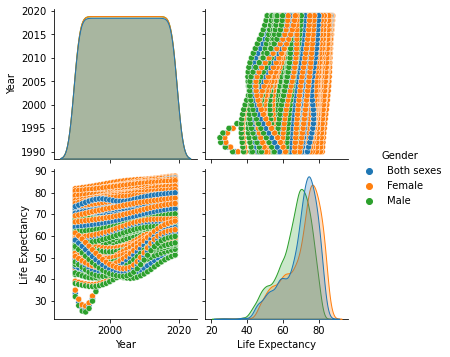

In [235]:
sns.pairplot(df[['Year', 'Gender', 'Life Expectancy']], hue='Gender')

### Life Expectancy

In [236]:
df[['Life Expectancy']].describe()

Life Expectancy
count     22050.000000
mean         69.011830
std           9.691938
min          24.834000
25%          63.082000
50%          71.134000
75%          76.254000
max          87.747000

<AxesSubplot:xlabel='Life Expectancy', ylabel='Density'>

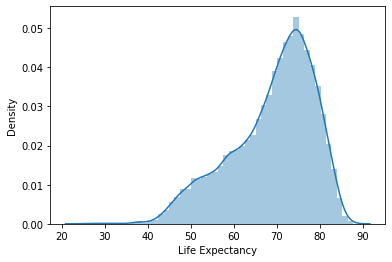

In [237]:
sns.distplot(df['Life Expectancy'])

Text(0, 0.5, 'Density')

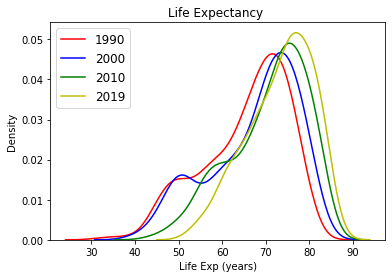

In [238]:
#Gráfica de la media por año
sns.distplot(df['Life Expectancy'][df['Year'] == 1990], hist=False, label='1990', color='r')
sns.distplot(df['Life Expectancy'][df['Year'] == 2000], hist=False, label='2000', color='b')
sns.distplot(df['Life Expectancy'][df['Year'] == 2010], hist=False, label='2010', color='g')
sns.distplot(df['Life Expectancy'][df['Year'] == 2019], hist=False, label='2019', color='y')
plt.legend(prop={'size': 12})
plt.title('Life Expectancy ')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density')

In [239]:
#Ver incremento o cambio por país

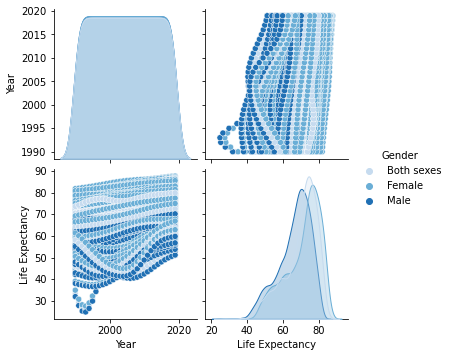

In [240]:
#Ver diferencia por género
sns.pairplot(df[['Country', 'Year', 'Gender', 'Life Expectancy']], hue='Gender', palette='Blues')

In [241]:
# Analizar valores max y  min
df[df['Life Expectancy'] < 40][['Country','Year', 'Gender', 'Life Expectancy']]

Country  Year      Gender  Life Expectancy
16410        Rwanda  1990  Both sexes           33.413
16411        Rwanda  1990      Female           34.941
16412        Rwanda  1990        Male           31.941
16413        Rwanda  1991  Both sexes           29.248
16414        Rwanda  1991      Female           30.761
16415        Rwanda  1991        Male           27.800
16416        Rwanda  1992  Both sexes           26.691
16417        Rwanda  1992      Female           28.161
16418        Rwanda  1992        Male           25.288
16419        Rwanda  1993  Both sexes           26.172
16420        Rwanda  1993      Female           27.571
16421        Rwanda  1993        Male           24.834
16422        Rwanda  1994  Both sexes           27.738
16423        Rwanda  1994      Female           29.042
16424        Rwanda  1994        Male           26.481
16425        Rwanda  1995  Both sexes           31.037
16426        Rwanda  1995      Female           32.232
16427        Rwanda  1995        Male           29.870
16428        Rwanda  1996  Both sexes           35.380
16429        Rwanda  1996      Female           36.463
16430        Rwanda  1996        Male           34.303
16431        Rwanda  1997  Both sexes           39.838
16433        Rwanda  1997        Male           38.840
17400  Sierra Leone  1990  Both sexes           38.563
17401  Sierra Leone  1990      Female           39.098
17402  Sierra Leone  1990        Male           38.033
17403  Sierra Leone  1991  Both sexes           38.122
17404  Sierra Leone  1991      Female           38.620
17405  Sierra Leone  1991        Male           37.630
17406  Sierra Leone  1992  Both sexes           37.717
17407  Sierra Leone  1992      Female           38.185
17408  Sierra Leone  1992        Male           37.256
17409  Sierra Leone  1993  Both sexes           37.384
17410  Sierra Leone  1993      Female           37.829
17411  Sierra Leone  1993        Male           36.945
17412  Sierra Leone  1994  Both sexes           37.158
17413  Sierra Leone  1994      Female           37.590
17414  Sierra Leone  1994        Male           36.730
17415  Sierra Leone  1995  Both sexes           37.083
17416  Sierra Leone  1995      Female           37.511
17417  Sierra Leone  1995        Male           36.655
17418  Sierra Leone  1996  Both sexes           37.194
17419  Sierra Leone  1996      Female           37.632
17420  Sierra Leone  1996        Male           36.755
17421  Sierra Leone  1997  Both sexes           37.496
17422  Sierra Leone  1997      Female           37.954
17423  Sierra Leone  1997        Male           37.033
17424  Sierra Leone  1998  Both sexes           37.980
17425  Sierra Leone  1998      Female           38.467
17426  Sierra Leone  1998        Male           37.483
17427  Sierra Leone  1999  Both sexes           38.634
17428  Sierra Leone  1999      Female           39.158
17429  Sierra Leone  1999        Male           38.099
17430  Sierra Leone  2000  Both sexes           39.441
17432  Sierra Leone  2000        Male           38.861
17435  Sierra Leone  2001        Male           39.745

In [242]:
#Outlier Detection
#Turkey IQR
#Values below Q1-1.5*(Q3-Q1) or above Q3+1.5*(Q3-Q1)
def find_outliers_Turkey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    floor = q1 - 1.5 * (q3-q1)
    ceiling = q3 + 1.5 * (q3-q1)
    outlier_values = x[(x < floor)|(x>ceiling)]
    print(f'Ceiling: {ceiling} \nFloor: {floor}')
    return outlier_values

Ceiling: 96.01200000000001 
Floor: 43.324


<AxesSubplot:xlabel='Life Expectancy', ylabel='Density'>

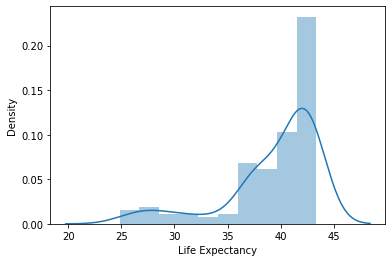

In [243]:
outliers_LifeExpectancy = find_outliers_Turkey(df['Life Expectancy'])
sns.distplot(outliers_LifeExpectancy)

<AxesSubplot:xlabel='Year', ylabel='Life Expectancy'>

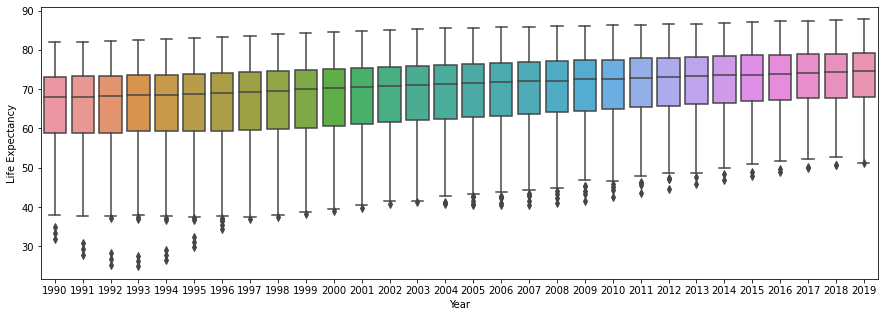

In [244]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Year', y='Life Expectancy', data=df)

In [245]:
#Se puede estandarizar la variable objetivo?

### Country

In [246]:
df[['Country']].describe()

Country
count    22050
unique     281
top      Ghana
freq        90

In [247]:
#Hay 281 países, habiendo 195 según la ONU(193 miembros y 2 observadores), por tanto vamos a eliminar aquellas filas que no son de países.

In [248]:
df['Country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Americas', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia, Central',
       'Australia', 'Australia & New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Caribbean', 'Cayman Islands',
       'Central African Republic', 'Central America',
       'Central and Southern Asia', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo'

In [249]:
#Obtenemos los países reconocidos por la ONU presentes en el dataset
f = ur.urlopen('https://raw.githubusercontent.com/MiguelRocaGarcia/DatasetTFG/master/UNRecognisedCountries.txt')
s = f.read().decode()
f.close()
UNCountries = s.split('\n')
print('Número de países: ', len(UNCountries))
UNCountries

Número de países:  195


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',

In [250]:
#Valores del dataset que no son países
notUNCountries = []
for country in df['Country'].unique():
    if(country not in UNCountries):
        notUNCountries.append(country)
notUNCountries

['Africa',
 'American Samoa',
 'Americas',
 'Anguilla',
 'Argentina',
 'Aruba',
 'Asia',
 'Asia, Central',
 'Australia & New Zealand',
 'Bermuda',
 'Bonaire Sint Eustatius and Saba',
 'British Virgin Islands',
 'Caribbean',
 'Cayman Islands',
 'Central America',
 'Central and Southern Asia',
 'Channel Islands',
 'Cook Islands',
 'Curacao',
 'Democratic Republic of Congo',
 'Eastern Africa',
 'Eastern Asia',
 'Eastern Europe',
 'Eastern and South-Eastern Asia',
 'Europe',
 'Europe and Northern America',
 'Europe, Western',
 'Faeroe Islands',
 'Falkland Islands',
 'French Guiana',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'High income countries',
 'Hong Kong',
 'Isle of Man',
 'Land-locked Developing Countries (LLDC)',
 'Latin America and the Caribbean',
 'Least Developed Countries',
 'Less Developed Regions',
 'Less Developed Regions, excluding China',
 'Less Developed Regions, excluding Least Developed Countries',
 'Low-income countries',
 'Lower-middle-

In [251]:
#Observamos que Democratic Republic of Congo está en la lista de países como Congo. 
# Sin embargo, tan solo tiene el valor de Life Expectancy(con los mismos valores), por lo tanto también se eliminarán
# estas filas

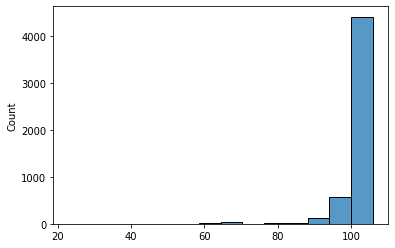

In [252]:
#Número de NaNs que hay en las filas que no son países
df_notUN = df[df['Country'].isin(notUNCountries)].reset_index(drop=True)
histNaNs(df[df['Country'].isin(notUNCountries)])

In [253]:
#Eliminamos aquellas filas que no son países
df = df[df['Country'].isin(UNCountries)]

In [254]:
def cleanCountry(df):
    df = df[df['Country'].isin(UNCountries)]#Eliminamos aquellas filas que no son de países
    return df

In [255]:
df = cleanCountry(df)

In [256]:
df.shape

(16830, 110)

### Year

In [257]:
df[['Year']].describe()

Year
count  16830.000000
mean    2004.500000
std        8.655699
min     1990.000000
25%     1997.000000
50%     2004.500000
75%     2012.000000
max     2019.000000

<AxesSubplot:xlabel='Year', ylabel='Count'>

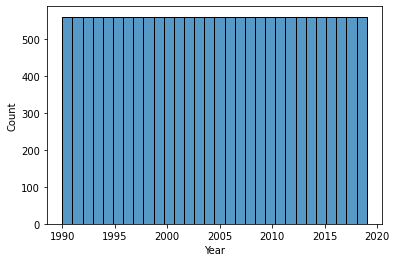

In [258]:
sns.histplot(df['Year'],bins=30)

<AxesSubplot:xlabel='Year', ylabel='Life Expectancy'>

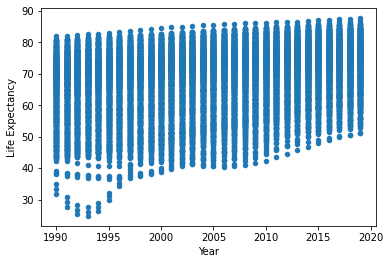

In [259]:
df.plot(kind='scatter', y='Life Expectancy', x ='Year')

In [260]:
df[df['Year']==1991].shape

(561, 110)

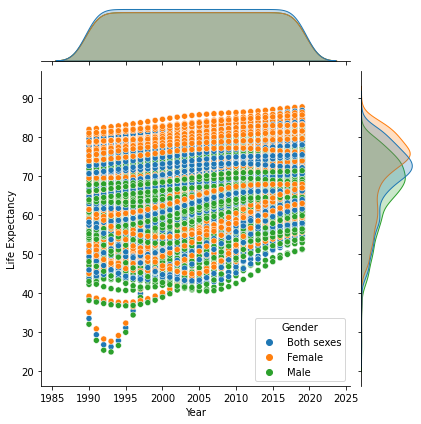

In [261]:
sns.jointplot(x='Year', y='Life Expectancy', data=df, hue='Gender')

### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

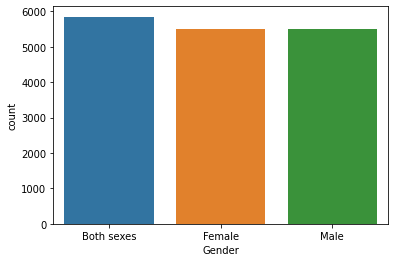

In [262]:
# Detectamos que hay más filas con both sexes que female y male
sns.countplot(x='Gender', data=df)

In [263]:
#Países de los que solo se tiene both sexes y no male y female
df_count_gender = df.groupby(['Country', 'Year']).size().reset_index().rename(columns={0: 'Count'})
countries_bothsexes = df_count_gender[df_count_gender['Count'] == 1]['Country'].unique() #Países de los que solo se tiene both sexes
countries_bothsexes

array(['Andorra', 'Dominica', 'Liechtenstein', 'Marshall Islands',
       'Monaco', 'Nauru', 'Niue', 'Palau', 'Saint Kitts and Nevis',
       'San Marino', 'Tuvalu', 'Vatican'], dtype=object)

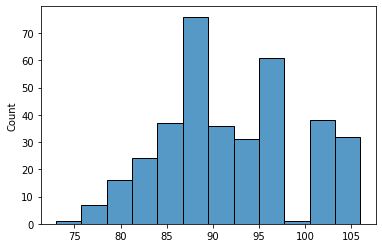

In [264]:
#Número de NaNs que hay en las filas de países que solo tienen both sexes
histNaNs(df[df['Country'].isin(countries_bothsexes)])

In [265]:
#En un principio voy a dejar estas filas pero me volveré a plantear eliminarlas

### Infant Mortality Rate

The infant mortality rate is the number of infant deaths for every 1,000 live births


In [266]:
df[['Infant Mortality Rate', 'Low CI Value Infant Mortality Rate', 'High CI Value Infant Mortality Rate']].describe()

Infant Mortality Rate  Low CI Value Infant Mortality Rate  \
count           13437.000000                        13437.000000   
mean               33.873780                           30.292168   
std                32.701673                           29.823689   
min                 1.420000                            0.780000   
25%                 7.920000                            7.420000   
50%                21.320000                           18.440000   
75%                51.640000                           44.950000   
max               189.200000                          173.300000   

       High CI Value Infant Mortality Rate  
count                         13437.000000  
mean                             38.211353  
std                              36.649036  
min                               1.780000  
25%                               8.540000  
50%                              24.460000  
75%                              58.540000  
max                             207.600000

In [267]:
#Número de valores NaN
df['Infant Mortality Rate'].isna().sum()

3393

<AxesSubplot:xlabel='Infant Mortality Rate', ylabel='Count'>

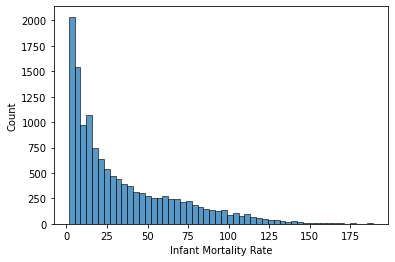

In [268]:
sns.histplot(df['Infant Mortality Rate'])

Text(0, 0.5, 'Density')

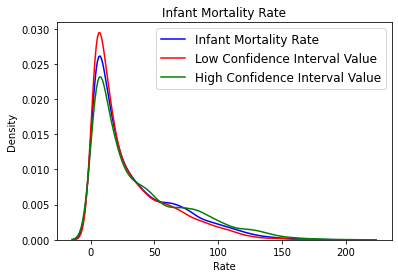

In [269]:
sns.kdeplot(df['Infant Mortality Rate'], label='Infant Mortality Rate', color='b',)
sns.kdeplot(df['Low CI Value Infant Mortality Rate'], label='Low Confidence Interval Value', color='r')
sns.kdeplot(df['High CI Value Infant Mortality Rate'], label='High Confidence Interval Value', color='g')
plt.legend(prop={'size': 12})
plt.title('Infant Mortality Rate')
plt.xlabel('Rate')
plt.ylabel('Density')

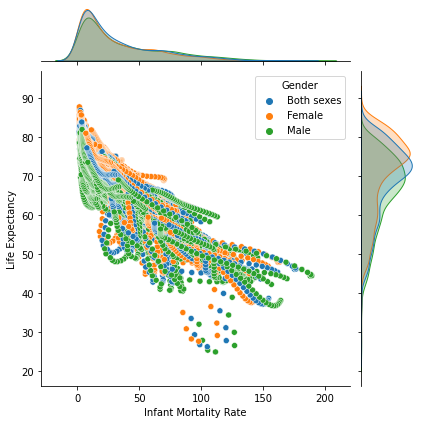

In [270]:
sns.jointplot(x='Infant Mortality Rate', y='Life Expectancy', data=df, hue='Gender')

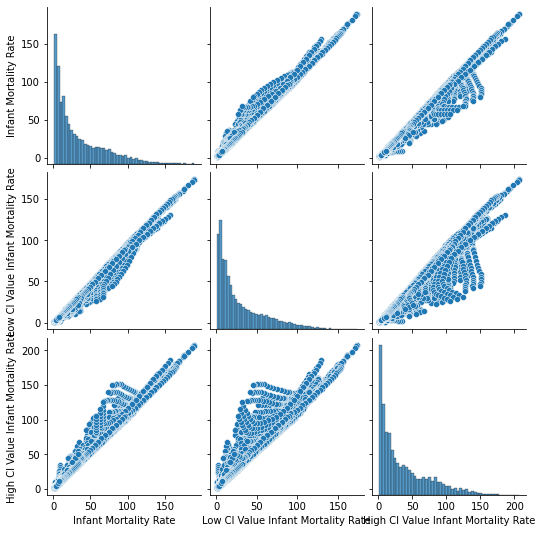

In [271]:
sns.pairplot(df[['Infant Mortality Rate', 'Low CI Value Infant Mortality Rate', 'High CI Value Infant Mortality Rate']])

Ceiling: 117.22 
Floor: -57.66


<AxesSubplot:xlabel='Infant Mortality Rate', ylabel='Density'>

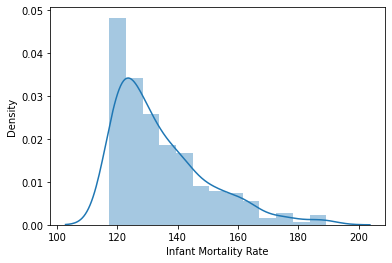

In [272]:
#Outliers
sns.distplot(find_outliers_Turkey(df[df['Infant Mortality Rate'].notna()]['Infant Mortality Rate']))

### Under 5 Mortality Rate

The under-five mortality rate is the number of deaths of infants and children under five years old per 1000 live births


In [273]:
df[['Under 5 Mortality Rate', 'Low CI Value Under 5 Mortality Rate', 'High CI Value Under 5 Mortality Rate']].describe()

Under 5 Mortality Rate  Low CI Value Under 5 Mortality Rate  \
count            13437.000000                         13437.000000   
mean                49.009727                            43.289297   
std                 54.347837                            49.074872   
min                  1.680000                             0.850000   
25%                  9.330000                             8.740000   
50%                 25.210000                            21.800000   
75%                 72.890000                            61.730000   
max                331.100000                           309.400000   

       High CI Value Under 5 Mortality Rate  
count                          13437.000000  
mean                              56.109021  
std                               61.562837  
min                                2.220000  
25%                               10.010000  
50%                               29.140000  
75%                               84.570000  
max                              354.400000

In [274]:
#Número de valores NaN
df['Under 5 Mortality Rate'].isna().sum()

3393

<AxesSubplot:xlabel='Under 5 Mortality Rate', ylabel='Count'>

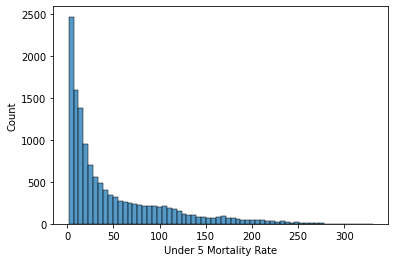

In [275]:
sns.histplot(df['Under 5 Mortality Rate'], label='Under 5 Mortality Rate')

Text(0.5, 1.0, 'Under 5 Mortality Rate')

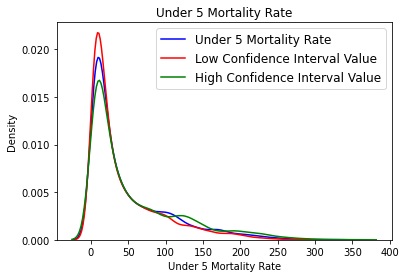

In [276]:
sns.kdeplot(df['Under 5 Mortality Rate'], label='Under 5 Mortality Rate', color='b',)
sns.kdeplot(df['Low CI Value Under 5 Mortality Rate'], label='Low Confidence Interval Value', color='r')
sns.kdeplot(df['High CI Value Under 5 Mortality Rate'], label='High Confidence Interval Value', color='g')
plt.legend(prop={'size': 12})
plt.title('Under 5 Mortality Rate')

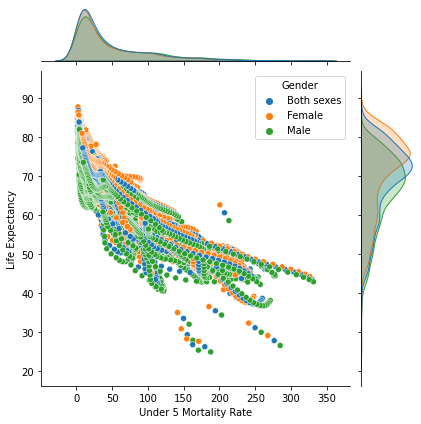

In [277]:
sns.jointplot(x='Under 5 Mortality Rate', y='Life Expectancy', data=df, hue='Gender')

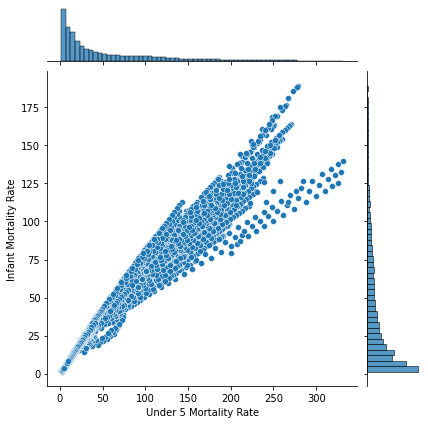

In [278]:
sns.jointplot(x='Under 5 Mortality Rate', y='Infant Mortality Rate', data=df)

### 

Ceiling: 168.23000000000002 
Floor: -86.01


<AxesSubplot:xlabel='Under 5 Mortality Rate', ylabel='Density'>

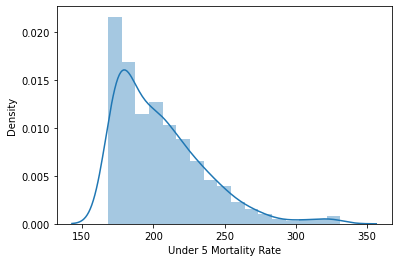

In [279]:
#Outliers
sns.distplot(find_outliers_Turkey(df[df['Under 5 Mortality Rate'].notna()]['Under 5 Mortality Rate']))

# % Death Cardiovascular

Probabilidad de morir por problemas cardiovasculares entre los 30 y los 70 años

In [280]:
df[['% Death Cardiovascular', 'Low CI Value % Death Cardiovascular', 'High CI Value % Death Cardiovascular']].describe()

% Death Cardiovascular  Low CI Value % Death Cardiovascular  \
count             9780.000000                          9780.000000   
mean                22.139100                            16.085930   
std                  9.018574                             6.649695   
min                  5.700000                             3.900000   
25%                 15.600000                            11.600000   
50%                 21.300000                            14.700000   
75%                 27.200000                            19.300000   
max                 64.100000                            49.500000   

       High CI Value % Death Cardiovascular  
count                           9780.000000  
mean                              29.163507  
std                               12.506450  
min                                6.300000  
25%                               19.200000  
50%                               28.700000  
75%                               37.000000  
max                               76.900000

In [281]:
df['% Death Cardiovascular'].isna().sum()

7050

<AxesSubplot:xlabel='% Death Cardiovascular', ylabel='Count'>

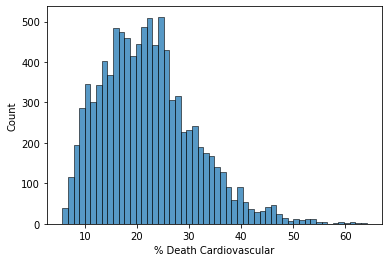

In [282]:
sns.histplot(df['% Death Cardiovascular'])

Text(0.5, 1.0, '% Death Cardiovascular')

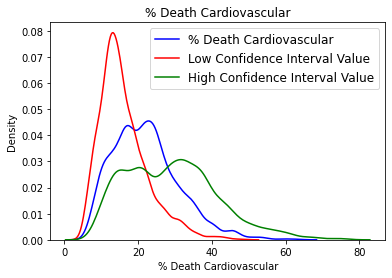

In [283]:
sns.kdeplot(df['% Death Cardiovascular'], label='% Death Cardiovascular', color='b',)
sns.kdeplot(df['Low CI Value % Death Cardiovascular'], label='Low Confidence Interval Value', color='r')
sns.kdeplot(df['High CI Value % Death Cardiovascular'], label='High Confidence Interval Value', color='g')
plt.legend(prop={'size': 12})
plt.title('% Death Cardiovascular')

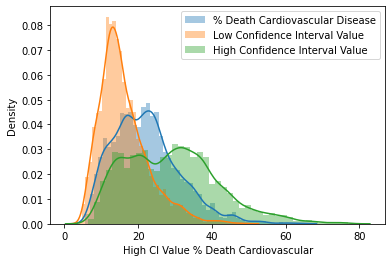

In [284]:
sns.distplot(df['% Death Cardiovascular'], label='% Death Cardiovascular Disease')
sns.distplot(df['Low CI Value % Death Cardiovascular'], label='Low Confidence Interval Value')
sns.distplot(df['High CI Value % Death Cardiovascular'], label='High Confidence Interval Value',)
plt.legend()


In [285]:
#Detectamos un intervalo de confianza mucho mayor

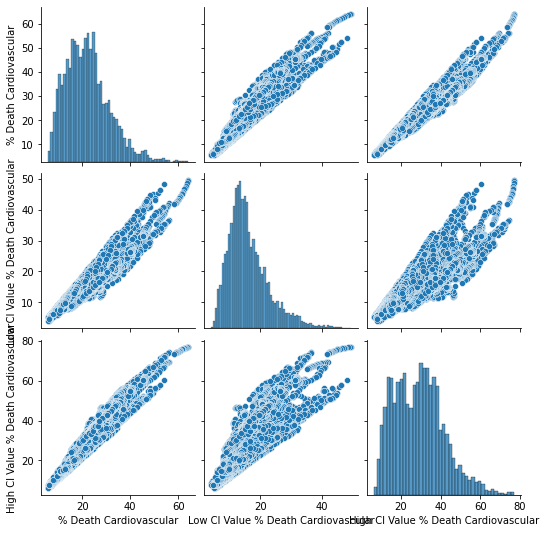

In [286]:
sns.pairplot(df[['% Death Cardiovascular', 'Low CI Value % Death Cardiovascular', 'High CI Value % Death Cardiovascular']])

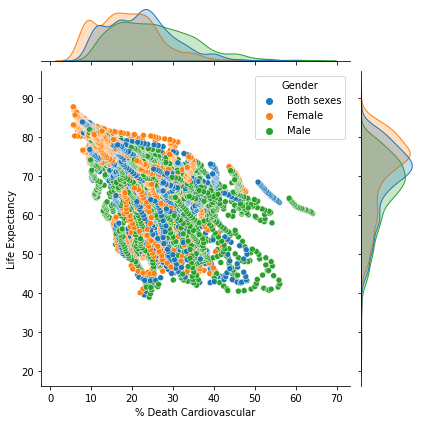

In [287]:
sns.jointplot(x='% Death Cardiovascular', y='Life Expectancy', data=df, hue='Gender')

Ceiling: 44.599999999999994 
Floor: -1.799999999999999


<AxesSubplot:xlabel='% Death Cardiovascular', ylabel='Density'>

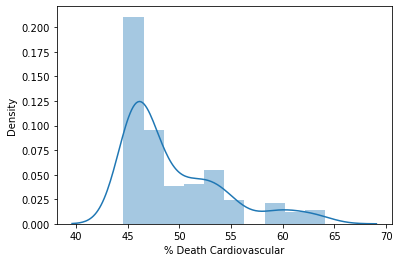

In [288]:
#Outliers
sns.distplot(find_outliers_Turkey(df[df['% Death Cardiovascular'].notna()]['% Death Cardiovascular']))

# Suicide Rates

Crude suicide rates (per 100 000 population)

In [289]:
df[['Suicides Rate']].describe()

Suicides Rate
count    2421.000000
mean        7.997852
std         9.257916
min         0.000000
25%         1.900000
50%         5.500000
75%        11.200000
max        87.200000

creo que en 2016 PONE SUICIDE RATES = 0 siempre

In [290]:
df[df['Year']==2016][['Suicides Rate']].describe()

Suicides Rate
count     486.000000
mean        0.011934
std         0.062438
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.700000

In [291]:
#Eliminamos el valor de Suicide Rates en 2016
df.loc[df['Year']==2016, 'Suicides Rate'] = np.nan

In [292]:
df['Suicides Rate'].isna().sum()

14895

In [293]:
#Vemos las características del dataset que tienen este dato
df[df['Suicides Rate'].notna()][['Country', 'Year', 'Life Expectancy', 'Suicides Rate']].describe()

Year  Life Expectancy  Suicides Rate
count  1935.000000      1935.000000    1935.000000
mean   2007.511628        68.803744      10.003618
std       5.595069         9.878839       9.337813
min    2000.000000        38.861000       0.000000
25%    2005.000000        62.068000       4.000000
50%    2010.000000        71.111000       7.300000
75%    2015.000000        76.326500      12.850000
max    2015.000000        86.961000      87.200000

Las comparamos con el dataset. En Suicide Rates tenemos entre el año 2000 y 2015 así que cogemos el dataset a entre esos años. Observamos que es una muestra representativa del total.


In [294]:
df[(df['Year'] >= 2000)&(df['Year'] <= 2015)][['Country', 'Year', 'Life Expectancy']].describe()

Year  Life Expectancy
count  8976.000000      8976.000000
mean   2007.500000        69.013795
std       4.610029         9.625792
min    2000.000000        38.861000
25%    2003.750000        62.637500
50%    2007.500000        71.232500
75%    2011.250000        76.233250
max    2015.000000        86.961000

<AxesSubplot:xlabel='Suicides Rate', ylabel='Count'>

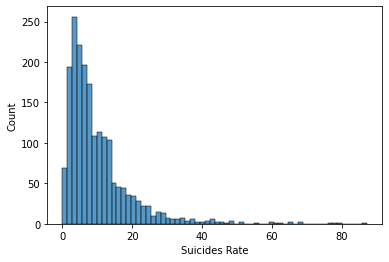

In [295]:
sns.histplot(df['Suicides Rate'])

In [296]:
def countriesGraph(df, countries, feature):
    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_axes([0,0,1,1])
    for country in countries:
        m = df[(df['Country']==country)& (df['Gender']=='Both sexes')][['Year', feature]].dropna().values
        x = m[:,0]
        y = m[:,1]
        ax1.plot(x,y, label=country)
    fig.legend(fontsize=10)

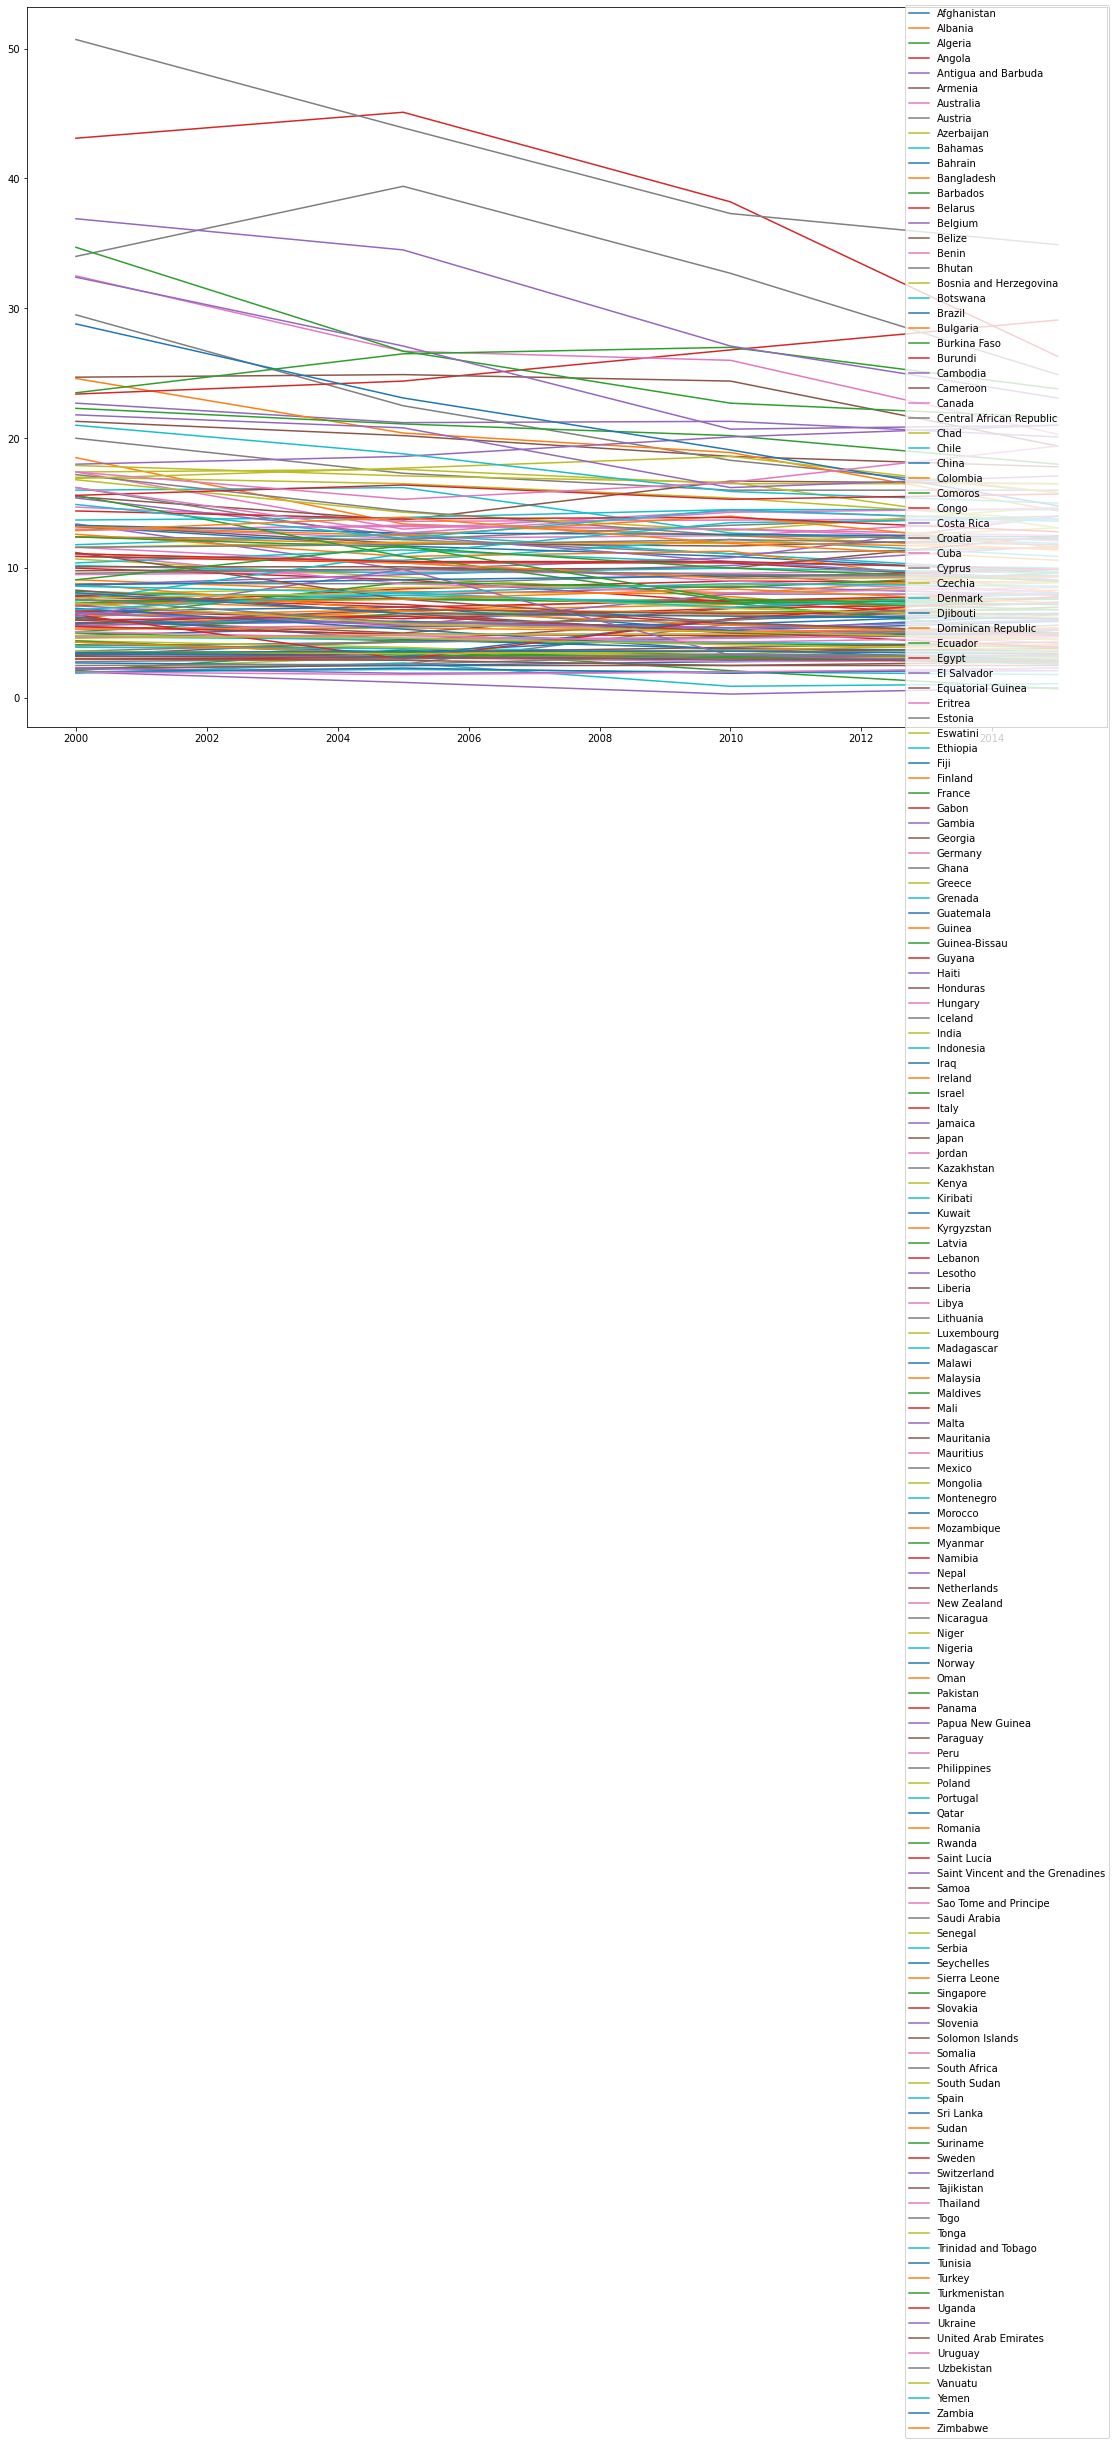

In [297]:
countriesSuicideRate = df[df['Suicides Rate'].notna()]['Country'].unique()
countriesGraph(df,countries=countriesSuicideRate, feature='Suicides Rate')

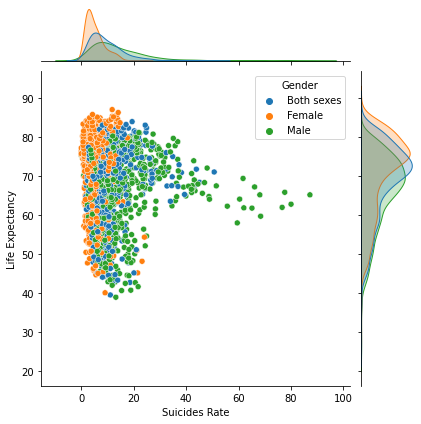

In [298]:
sns.jointplot(x='Suicides Rate', y='Life Expectancy', data=df, hue='Gender')

Ceiling: 26.125000000000004 
Floor: -9.275000000000002


<AxesSubplot:xlabel='Suicides Rate', ylabel='Density'>

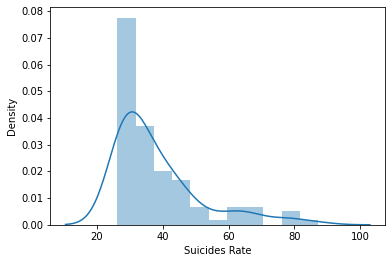

In [299]:
#Outliers
sns.distplot(find_outliers_Turkey(df[df['Suicides Rate'].notna()]['Suicides Rate']))

## Alcohol Abuse

Total (recorded+unrecorded) alcohol per capita (15+) consumption

In [300]:
#Número de valores vacíos
df['Alcohol Abuse'].isna().sum()

14418

In [301]:
#Vemos las características del dataset que tienen este dato
df[df['Alcohol Abuse'].notna()][['Country', 'Year', 'Life Expectancy', 'Alcohol Abuse']].describe()

Year  Life Expectancy  Alcohol Abuse
count  2412.000000      2412.000000    2412.000000
mean   2009.687811        69.589426       6.082882
std       6.521379         9.557605       5.514739
min    2000.000000        38.861000       0.000000
25%    2005.000000        63.385250       1.690000
50%    2010.000000        71.571500       4.410000
75%    2015.000000        76.808750       9.147500
max    2018.000000        87.514000      31.960000

In [302]:
df[(df['Year'] >= 2000)&(df['Year'] <= 2018)][['Country', 'Year', 'Life Expectancy']].describe()

Year  Life Expectancy
count  10659.000000     10659.000000
mean    2009.000000        69.505820
std        5.477483         9.442704
min     2000.000000        38.861000
25%     2004.000000        63.438500
50%     2009.000000        71.554000
75%     2014.000000        76.558000
max     2018.000000        87.514000

<AxesSubplot:xlabel='Alcohol Abuse', ylabel='Count'>

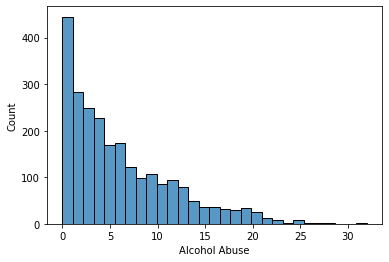

In [303]:
sns.histplot(df['Alcohol Abuse'])

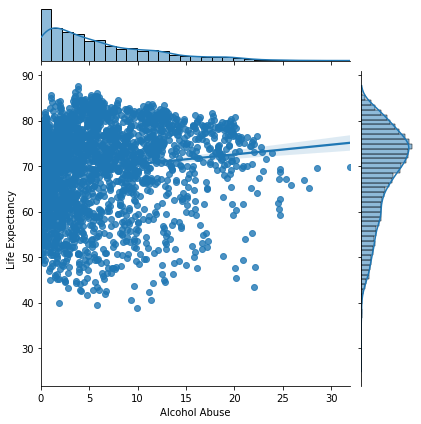

In [304]:
sns.jointplot(x='Alcohol Abuse', y='Life Expectancy', data=df, kind='reg')

Ceiling: 20.333750000000002 
Floor: -9.496250000000002


<AxesSubplot:xlabel='Alcohol Abuse', ylabel='Density'>

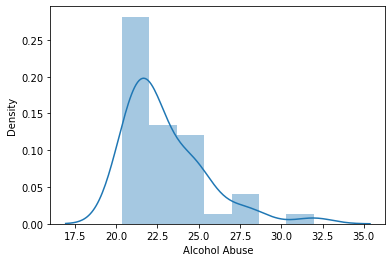

In [305]:
#Outliers
sns.distplot(find_outliers_Turkey(df[df['Alcohol Abuse'].notna()]['Alcohol Abuse']))

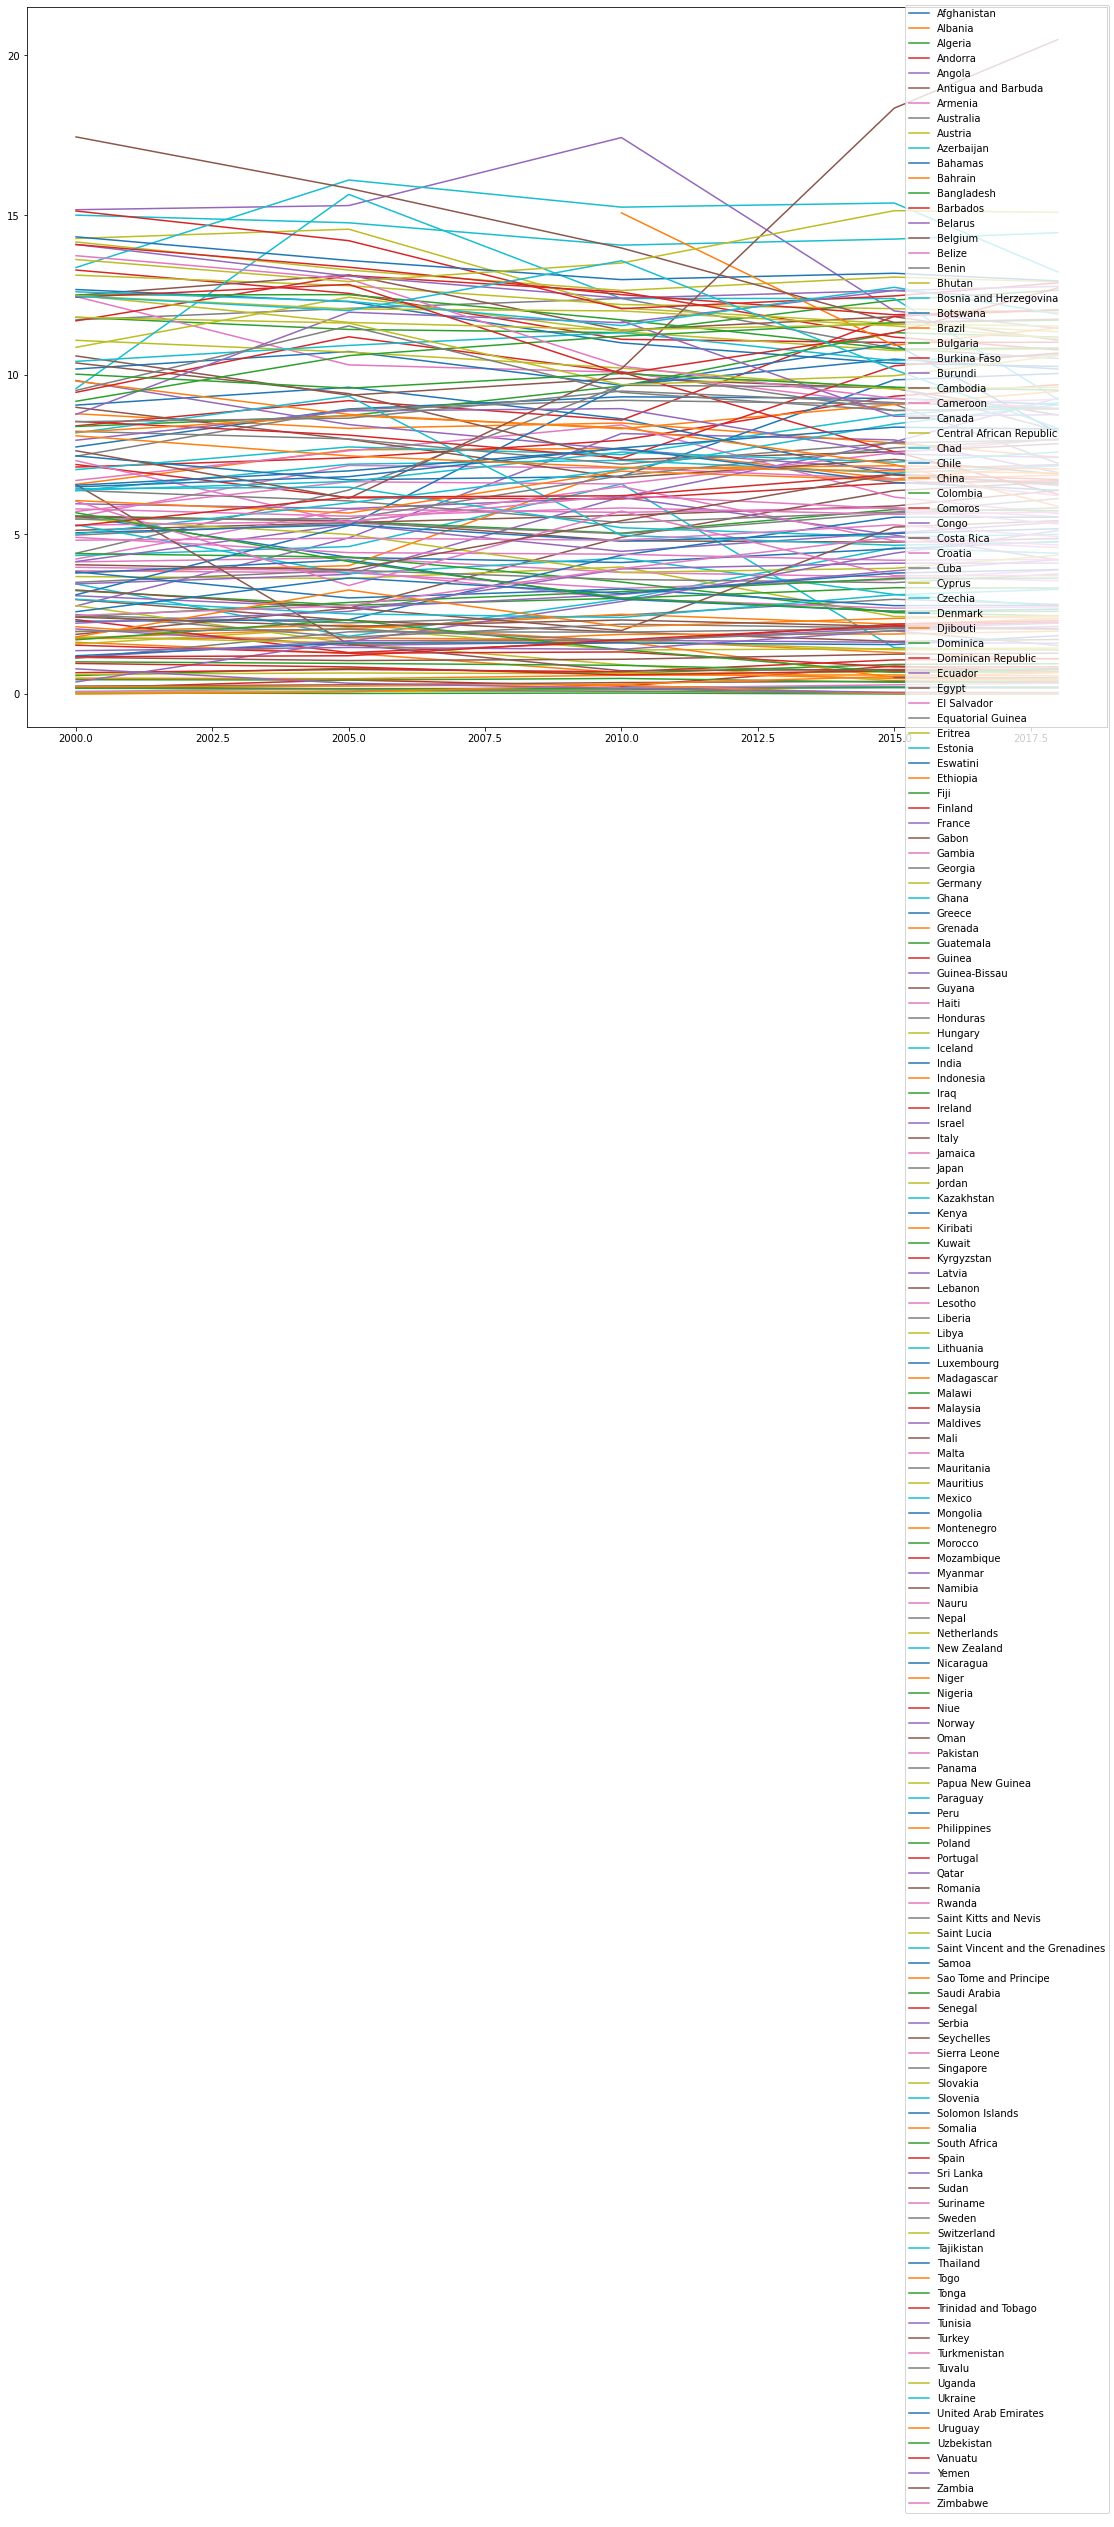

In [306]:
countriesSuicideRate = df[df['Alcohol Abuse'].notna()]['Country'].unique()
countriesGraph(df,countries=countriesSuicideRate, feature='Alcohol Abuse')

## Air Pollution Death Rate

Vale para todos

Ambient and household air pollution attributable death rate (per 100 000 population)

In [307]:
#Vemos las características del dataset que tienen este dato
df[df['Air Pollution Death Rate Stroke'].notna()][['Country', 'Year', 'Life Expectancy', 'Air Pollution Death Rate Stroke']].describe()

Year  Life Expectancy  Air Pollution Death Rate Stroke
count   486.0       486.000000                       486.000000
mean   2016.0        71.714377                        12.421996
std       0.0         8.187356                         9.154180
min    2016.0        48.969000                         1.200000
25%    2016.0        65.500250                         5.722500
50%    2016.0        73.153500                        10.215000
75%    2016.0        78.134750                        16.250000
max    2016.0        87.154000                        59.330000

Solo hay datos de 2016

In [308]:
df[(df['Year'] == 2016)][['Country', 'Year', 'Life Expectancy']].describe()

Year  Life Expectancy
count   561.0       561.000000
mean   2016.0        71.886599
std       0.0         8.005840
min    2016.0        48.969000
25%    2016.0        66.305000
50%    2016.0        73.264000
75%    2016.0        78.013000
max    2016.0        87.154000

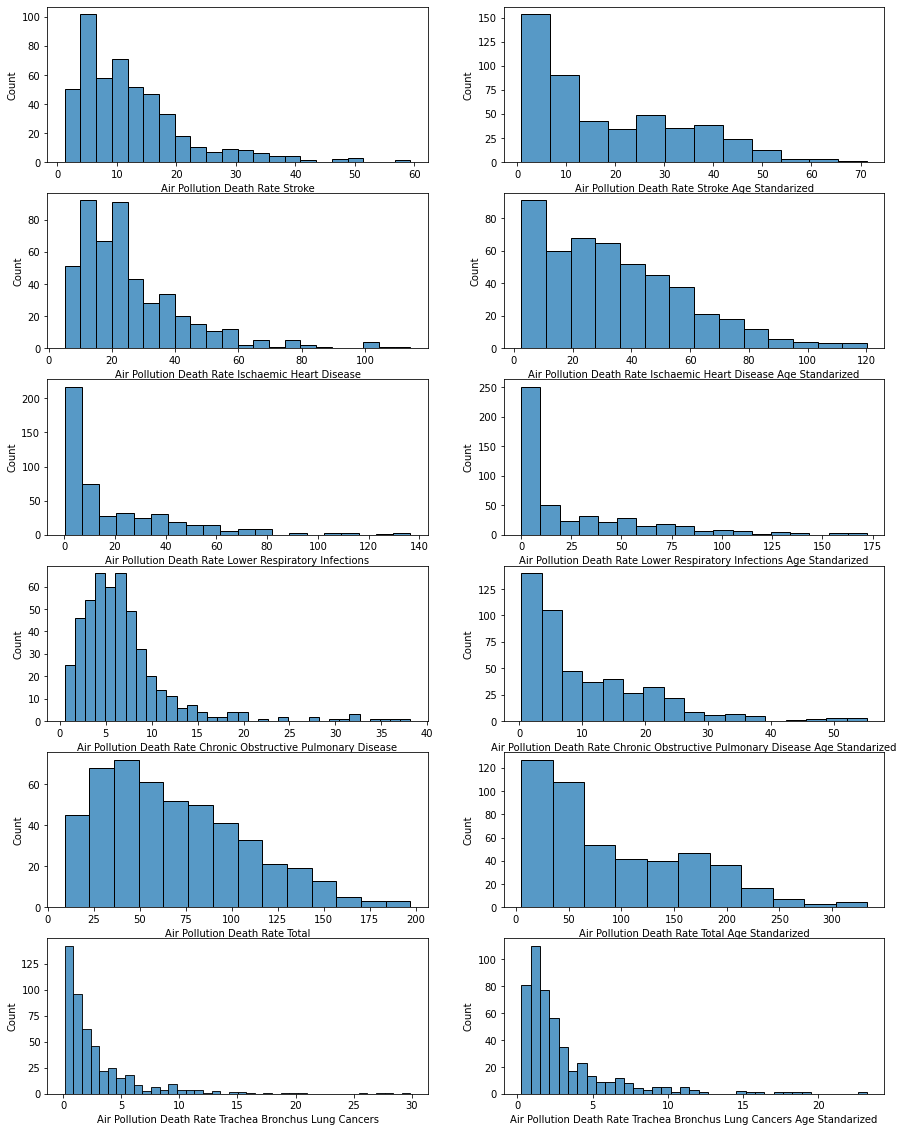

In [309]:
plt.figure(figsize=(15,20))
i=1
for item in ['Air Pollution Death Rate Stroke', 'Air Pollution Death Rate Ischaemic Heart Disease', 
             'Air Pollution Death Rate Lower Respiratory Infections','Air Pollution Death Rate Chronic Obstructive Pulmonary Disease',
             'Air Pollution Death Rate Total', 'Air Pollution Death Rate Trachea Bronchus Lung Cancers']:
    plt.subplot(6,2,i)
    sns.histplot(df[item])
    i += 1
    plt.subplot(6,2,i)
    sns.histplot(df[f'{item} Age Standarized'])
    i += 1

## Unsafe Wash Mortality Rate

Mortality rate attributed to exposure to unsafe WASH services (per 100 000 population) (SDG 3.9.2)

In [310]:
#Vemos las características del dataset que tienen este dato
df[df['Unsafe Wash Mortality Rate'].notna()][['Country', 'Year', 'Life Expectancy', 'Unsafe Wash Mortality Rate']].describe()

Year  Life Expectancy  Unsafe Wash Mortality Rate
count   486.0       486.000000                  486.000000
mean   2016.0        71.714377                   12.928595
std       0.0         8.187356                   21.262346
min    2016.0        48.969000                    0.004000
25%    2016.0        65.500250                    0.190000
50%    2016.0        73.153500                    1.205000
75%    2016.0        78.134750                   18.587500
max    2016.0        87.154000                  107.000000

In [311]:
df[(df['Year'] == 2016)][['Country', 'Year', 'Life Expectancy']].describe()

Year  Life Expectancy
count   561.0       561.000000
mean   2016.0        71.886599
std       0.0         8.005840
min    2016.0        48.969000
25%    2016.0        66.305000
50%    2016.0        73.264000
75%    2016.0        78.013000
max    2016.0        87.154000

<AxesSubplot:xlabel='Unsafe Wash Mortality Rate', ylabel='Count'>

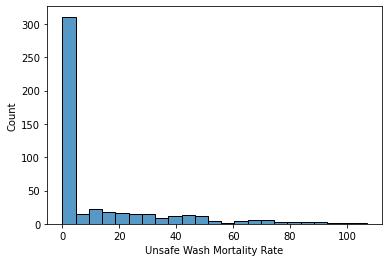

In [312]:
sns.histplot(df['Unsafe Wash Mortality Rate'])

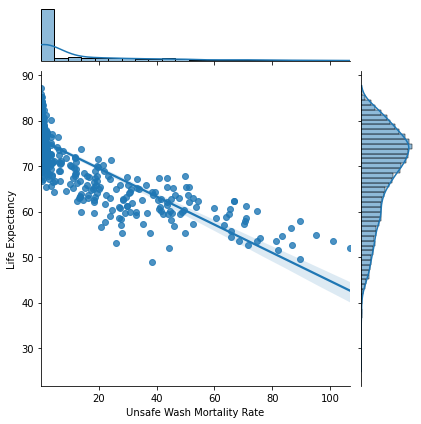

In [313]:
#Relación con la variable objetivo
sns.jointplot(x='Unsafe Wash Mortality Rate', y='Life Expectancy',data=df, kind='reg')

Ceiling: 46.183749999999996 
Floor: -27.406249999999996


<AxesSubplot:xlabel='Unsafe Wash Mortality Rate', ylabel='Density'>

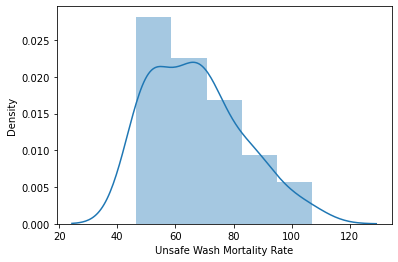

In [314]:
#Outliers
sns.distplot(find_outliers_Turkey(df[df['Unsafe Wash Mortality Rate'].notna()]['Unsafe Wash Mortality Rate']))

## Poisoning Mortality Rate

Mortality rate attributed to unintentional poisoning (per 100 000 population)

In [315]:
#Vemos las características del dataset que tienen este dato
df[df['Poisoning Mortality Rate'].notna()][['Country', 'Year', 'Life Expectancy', 'Poisoning Mortality Rate']].describe()

Year  Life Expectancy  Poisoning Mortality Rate
count  2421.000000      2421.000000               2421.000000
mean   2009.215613        69.388035                  1.393468
std       6.048408         9.632580                  1.653830
min    2000.000000        38.861000                  0.039000
25%    2005.000000        62.944000                  0.300000
50%    2010.000000        71.410000                  0.670000
75%    2015.000000        76.732000                  2.120000
max    2016.000000        87.154000                 25.990000

In [316]:
df[(df['Year'] >= 2000)&(df['Year'] <= 2016)][['Country', 'Year', 'Life Expectancy']].describe()

Year  Life Expectancy
count  9537.000000      9537.000000
mean   2008.000000        69.182783
std       4.899236         9.561684
min    2000.000000        38.861000
25%    2004.000000        62.914000
50%    2008.000000        71.340000
75%    2012.000000        76.353000
max    2016.000000        87.154000

<AxesSubplot:xlabel='Poisoning Mortality Rate', ylabel='Count'>

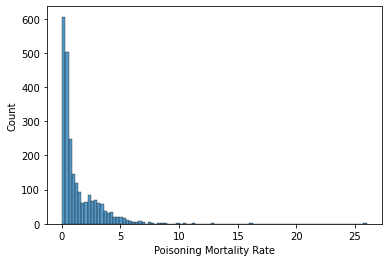

In [317]:
sns.histplot(df['Poisoning Mortality Rate'])

Ceiling: 4.85 
Floor: -2.43


<AxesSubplot:xlabel='Poisoning Mortality Rate', ylabel='Density'>

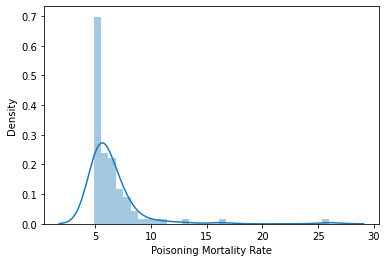

In [318]:
#Outliers
sns.distplot(find_outliers_Turkey(df[df['Poisoning Mortality Rate'].notna()]['Poisoning Mortality Rate']))

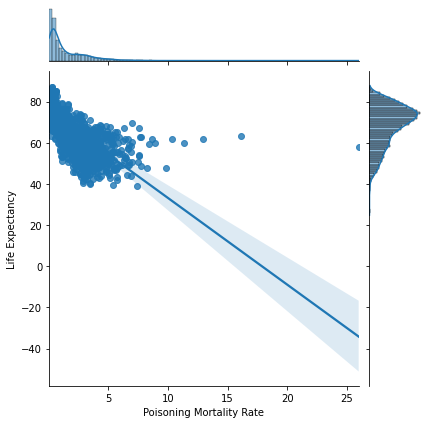

In [319]:
#Relación con la variable objetivo
sns.jointplot(x='Poisoning Mortality Rate', y='Life Expectancy',data=df, kind='reg')

## Tobacco Prevalence

Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older

In [320]:
#Vemos las características del dataset que tienen este dato
df[df['Tobacco Prevalence'].notna()][['Country', 'Year', 'Life Expectancy', 'Tobacco Prevalence']].describe()

Year  Life Expectancy  Tobacco Prevalence
count  3573.000000      3573.000000         3573.000000
mean   2012.000000        71.140145           24.307081
std       5.657646         9.138537           15.375137
min    2000.000000        38.861000            0.200000
25%    2010.000000        65.393000           12.200000
50%    2014.000000        72.945000           23.400000
75%    2016.000000        78.295000           34.100000
max    2018.000000        87.514000           83.000000

In [321]:
df[(df['Year'] >= 2000)&(df['Year'] <= 2018)][['Country', 'Year', 'Life Expectancy']].describe()

Year  Life Expectancy
count  10659.000000     10659.000000
mean    2009.000000        69.505820
std        5.477483         9.442704
min     2000.000000        38.861000
25%     2004.000000        63.438500
50%     2009.000000        71.554000
75%     2014.000000        76.558000
max     2018.000000        87.514000

No es una muestra representativa. A lo mejor me la cargo.

<AxesSubplot:xlabel='Tobacco Prevalence', ylabel='Count'>

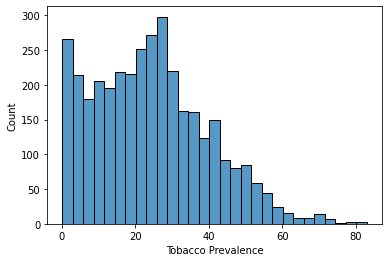

In [322]:
sns.histplot(df['Tobacco Prevalence'])

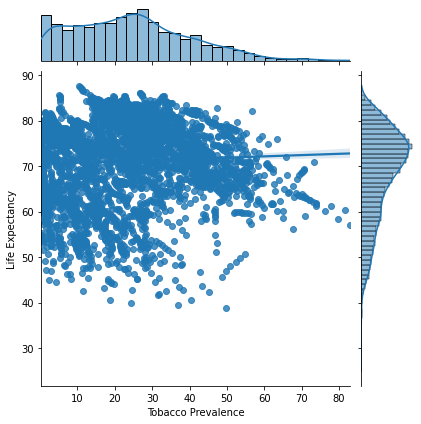

In [323]:
sns.jointplot(x='Tobacco Prevalence', y='Life Expectancy',data=df,kind='reg')

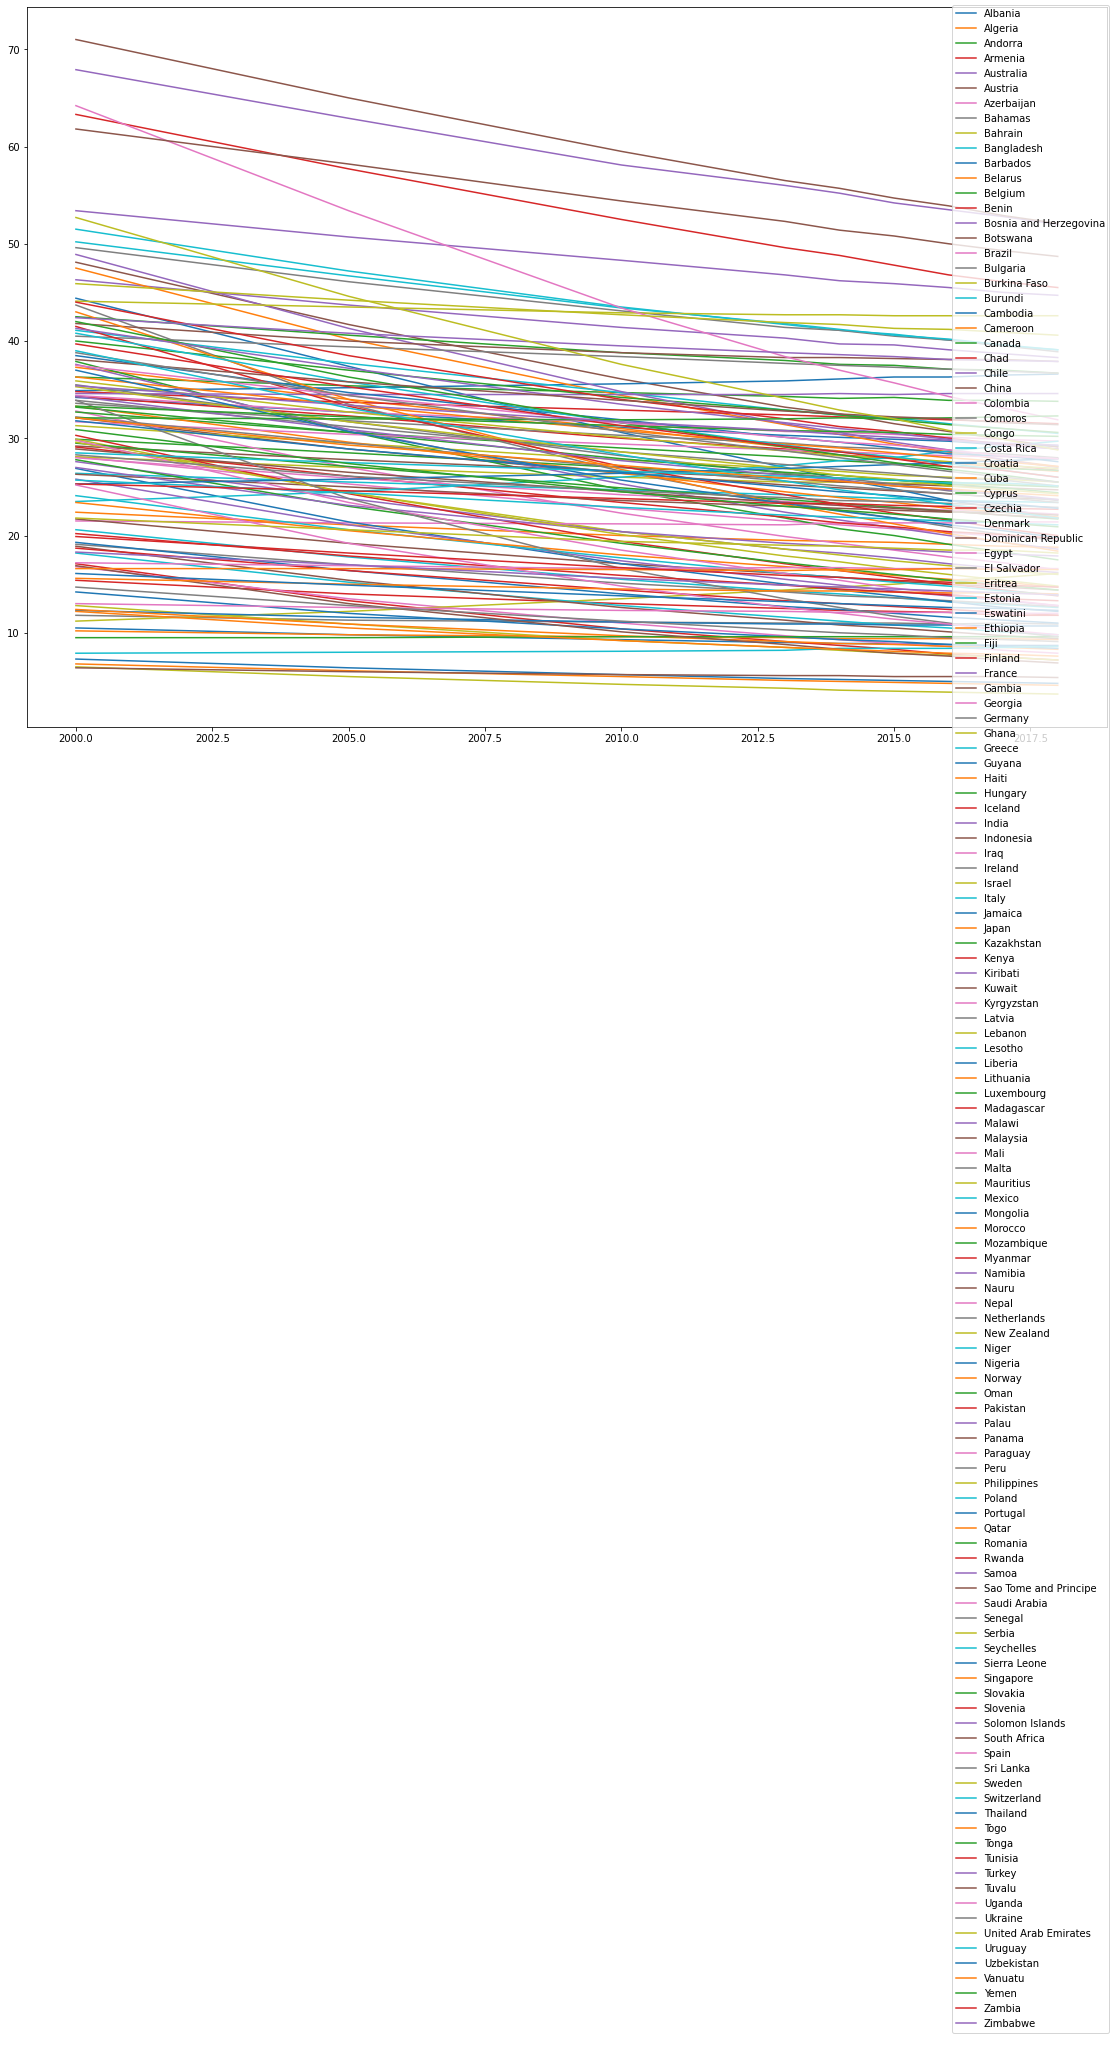

In [324]:
countriesSuicideRate = df[df['Tobacco Prevalence'].notna()]['Country'].unique()
countriesGraph(df,countries=countriesSuicideRate, feature='Tobacco Prevalence')

## Population

In [325]:
df[['% Population Aged 0-14', '% Population Aged 15-64', '% Population Aged 65+', 
   '% Population Aged 65-69', '% Population Aged 70-74', '% Population Aged 75-79',
   '% Population Aged 80+']].describe()

% Population Aged 0-14  % Population Aged 15-64  % Population Aged 65+  \
count            14376.000000             14376.000000           14376.000000   
mean                31.339509                61.320024               7.340466   
std                 10.974372                 7.107406               5.372979   
min                  8.629462                45.950978               0.489259   
25%                 20.761621                54.851096               3.241278   
50%                 31.546016                62.546098               4.952325   
75%                 41.765667                66.794132              10.869272   
max                 51.735845                90.881279              30.878968   

       % Population Aged 65-69  % Population Aged 70-74  \
count              9584.000000              9584.000000   
mean                  2.526054                 1.939400   
std                   1.520560                 1.336062   
min                   0.190236                 0.095368   
25%                   1.349218                 0.929007   
50%                   1.892973                 1.376649   
75%                   3.653189                 2.836592   
max                   7.595664                 7.348951   

       % Population Aged 75-79  % Population Aged 80+  
count              9584.000000            9584.000000  
mean                  1.385664               1.482335  
std                   1.123104               1.600137  
min                   0.066610               0.060053  
25%                   0.558609               0.381246  
50%                   0.897209               0.770614  
75%                   1.994061               1.998797  
max                   5.801685              10.867064

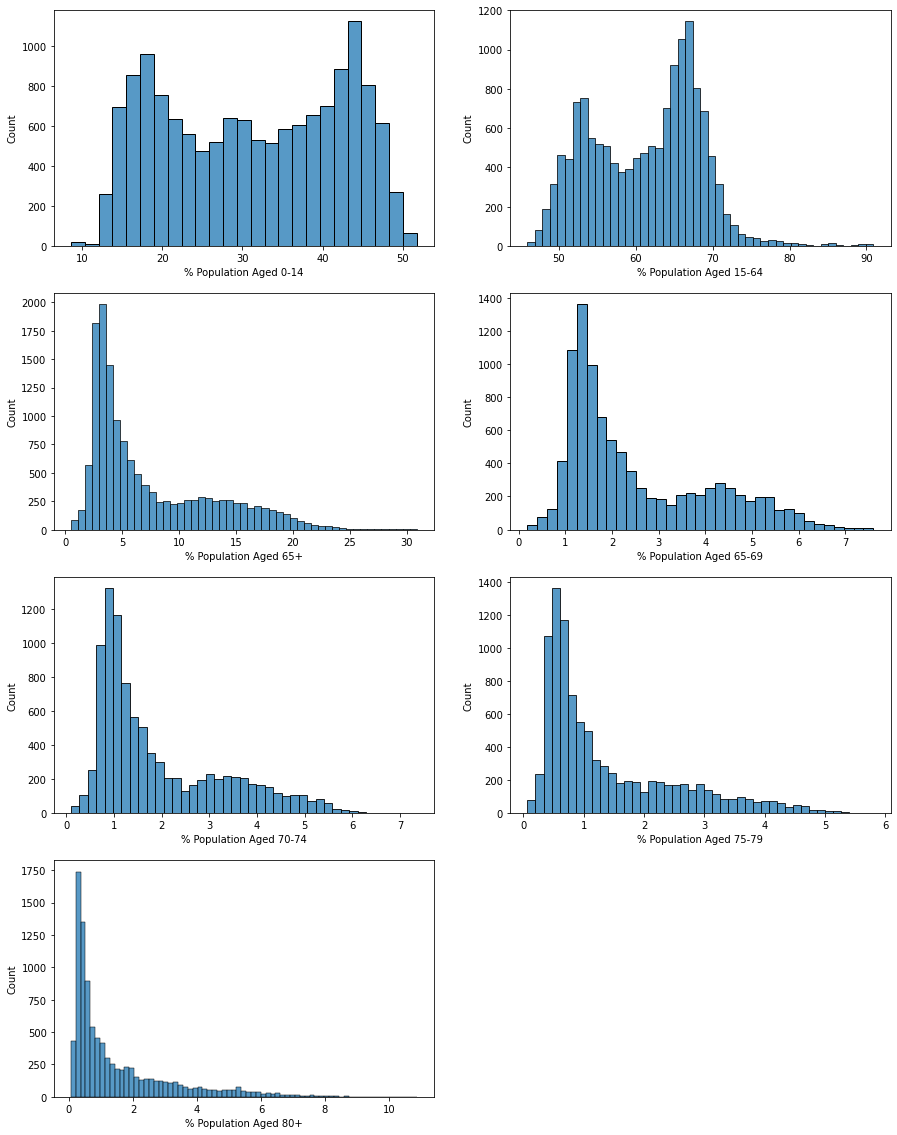

In [326]:
plt.figure(figsize=(15,20))
i=1
for item in ['% Population Aged 0-14', '% Population Aged 15-64', '% Population Aged 65+', 
             '% Population Aged 65-69', '% Population Aged 70-74', '% Population Aged 75-79', '% Population Aged 80+']:
    plt.subplot(4,2,i)
    sns.histplot(df[item])
    i += 1

<Figure size 1080x1440 with 0 Axes>

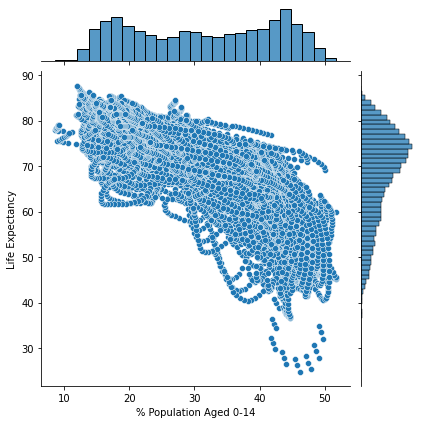

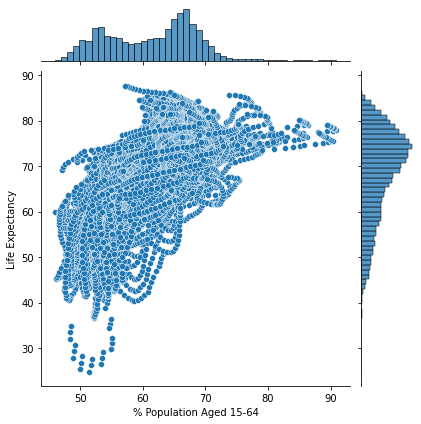

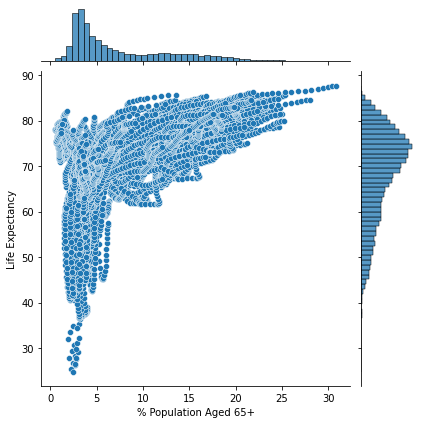

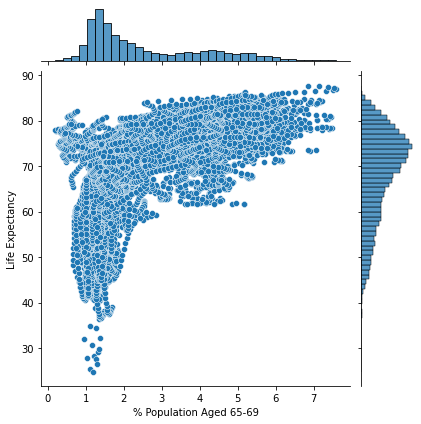

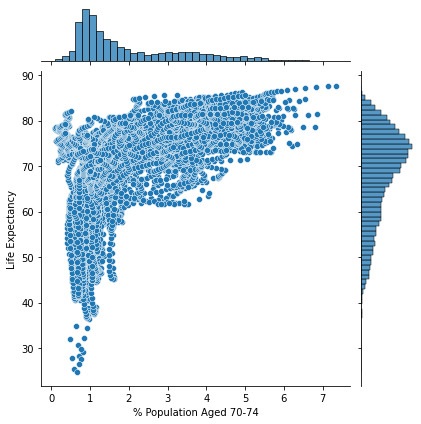

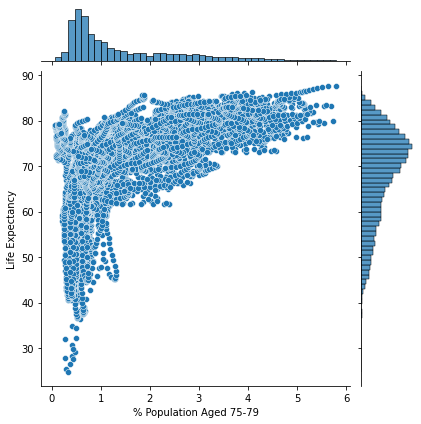

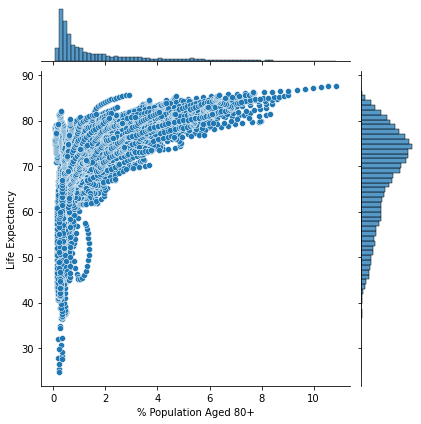

In [327]:
plt.figure(figsize=(15,20))
for item in ['% Population Aged 0-14', '% Population Aged 15-64', '% Population Aged 65+', 
             '% Population Aged 65-69', '% Population Aged 70-74', '% Population Aged 75-79', '% Population Aged 80+']:
    sns.jointplot(x=item, y='Life Expectancy', data=df)

## Maternal Mortality Ratio

Maternal mortality ratio (per 100 000 live births)

In [328]:
#Vemos las características del dataset que tienen este dato
df[df['Maternal Mortality Ratio'].notna()][['Country', 'Year', 'Life Expectancy', 'Maternal Mortality Ratio']].describe()

Year  Life Expectancy  Maternal Mortality Ratio
count  8715.000000      8715.000000               8715.000000
mean   2008.513253        69.121372                214.175215
std       5.190111         9.743108                312.008422
min    2000.000000        38.861000                  2.000000
25%    2004.000000        62.508500                 14.000000
50%    2009.000000        71.326000                 66.000000
75%    2013.000000        76.550000                305.000000
max    2017.000000        87.341000               2480.000000

<AxesSubplot:xlabel='Maternal Mortality Ratio', ylabel='Count'>

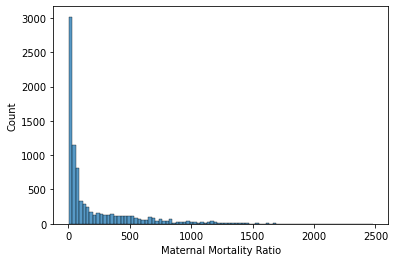

In [329]:
sns.histplot(df['Maternal Mortality Ratio'])

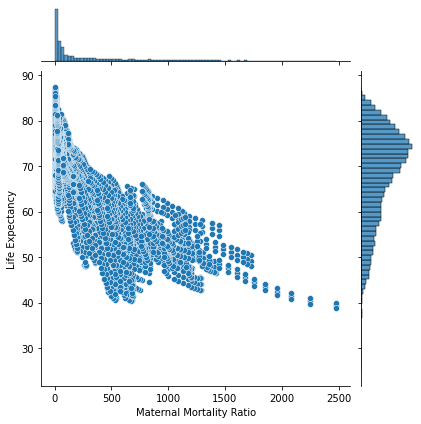

In [330]:
sns.jointplot(x='Maternal Mortality Ratio', y='Life Expectancy', data=df)

## % of Births Attended By Skilled Personal

Births attended by skilled health personnel (%)

In [331]:
#Vemos las características del dataset que tienen este dato
df[df['% of Births Attended By Skilled Personal'].notna()][['Country', 'Year', 'Life Expectancy', '% of Births Attended By Skilled Personal']].describe()

Year  Life Expectancy  % of Births Attended By Skilled Personal
count  6993.000000      6993.000000                               6993.000000
mean   2005.347919        71.206996                                 88.740715
std       7.550483         8.356503                                 20.423975
min    1990.000000        25.288000                                  5.000000
25%    2000.000000        67.216000                                 90.100000
50%    2006.000000        72.929000                                 98.600000
75%    2012.000000        77.018000                                 99.700000
max    2019.000000        87.514000                                100.000000

In [332]:
df[df['% of Births Attended By Skilled Personal']>100]['% of Births Attended By Skilled Personal']

Series([], Name: % of Births Attended By Skilled Personal, dtype: float64)

In [333]:
df[['Country', 'Year', 'Life Expectancy']].describe()

Year  Life Expectancy
count  16830.000000     16830.000000
mean    2004.500000        68.240523
std        8.655699         9.892792
min     1990.000000        24.834000
25%     1997.000000        61.831750
50%     2004.500000        70.346500
75%     2012.000000        75.607750
max     2019.000000        87.669000

<AxesSubplot:xlabel='Year', ylabel='Count'>

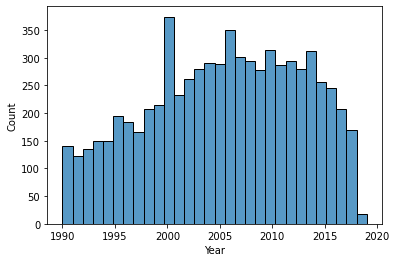

In [334]:
sns.histplot(df[df['% of Births Attended By Skilled Personal'].notna()]['Year'], bins=30)

No es una muestra representativa del conjunto porque los años que tiene son muy salteados

<AxesSubplot:xlabel='% of Births Attended By Skilled Personal', ylabel='Count'>

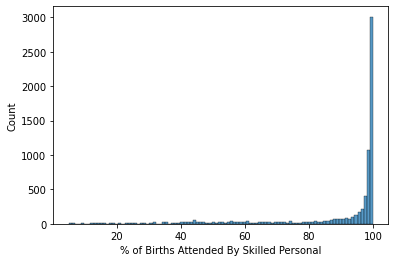

In [227]:
sns.histplot(df['% of Births Attended By Skilled Personal'])

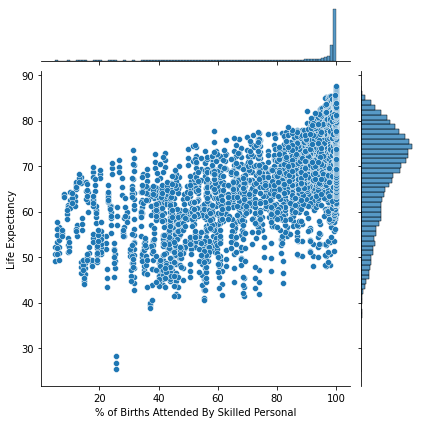

In [335]:
sns.jointplot(x='% of Births Attended By Skilled Personal', y='Life Expectancy', data=df)

## Neonatal Mortality Rate

Neonatal mortality rate (per 1000 live births)

In [336]:
#Vemos las características del dataset que tienen este dato
df[df['Neonatal Mortality Rate'].notna()][['Country', 'Year', 'Life Expectancy', 'Neonatal Mortality Rate']].describe()

Year  Life Expectancy  Neonatal Mortality Rate
count  14817.000000     14817.000000             14817.000000
mean    2004.519133        68.114608                18.322376
std        8.660133        10.107207                14.761934
min     1990.000000        24.834000                 0.780000
25%     1997.000000        61.368000                 5.580000
50%     2005.000000        70.268000                13.900000
75%     2012.000000        75.714000                28.100000
max     2019.000000        87.669000                74.310000

<AxesSubplot:xlabel='Neonatal Mortality Rate', ylabel='Count'>

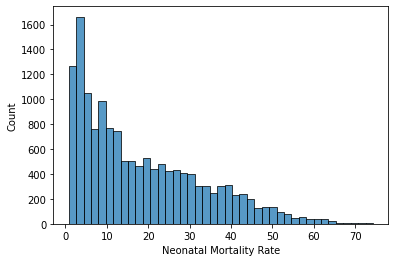

In [337]:
sns.histplot(df['Neonatal Mortality Rate'])

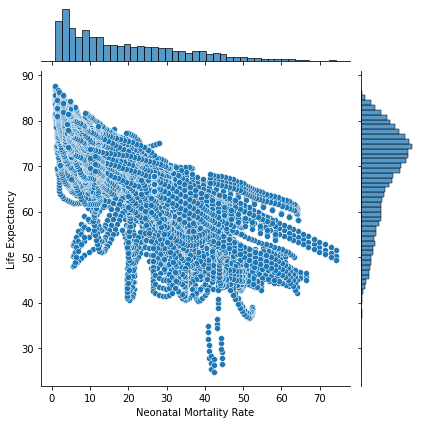

In [338]:
sns.jointplot(x='Neonatal Mortality Rate', y='Life Expectancy', data=df)

## Incidence of Malaria

Malaria incidence (per 1 000 population at risk)

In [339]:
#Vemos las características del dataset que tienen este dato
df[df['Incidence of Malaria'].notna()][['Country', 'Year', 'Life Expectancy', 'Incidence of Malaria']].describe()

Year  Life Expectancy  Incidence of Malaria
count  5268.000000      5268.000000           5268.000000
mean   2009.025057        64.295416            113.475116
std       5.479975         8.837629            158.424140
min    2000.000000        38.861000              0.000000
25%    2004.000000        57.827000              0.577500
50%    2009.000000        65.170500             13.980000
75%    2014.000000        71.537500            216.475000
max    2018.000000        82.730000            743.500000

In [340]:
df[(df['Year'] >= 2000)&(df['Year'] <= 2018)][['Country', 'Year', 'Life Expectancy']].describe()

Year  Life Expectancy
count  10659.000000     10659.000000
mean    2009.000000        69.505820
std        5.477483         9.442704
min     2000.000000        38.861000
25%     2004.000000        63.438500
50%     2009.000000        71.554000
75%     2014.000000        76.558000
max     2018.000000        87.514000

Dista de forma excesiva el conjunto con valor de Incidence de Malaria conocido con el total

<AxesSubplot:xlabel='Incidence of Malaria', ylabel='Count'>

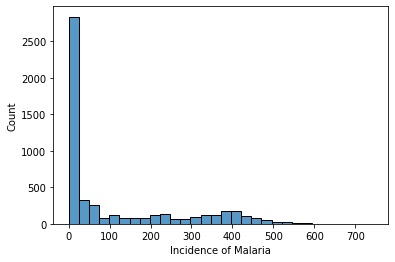

In [341]:
sns.histplot(df['Incidence of Malaria'])

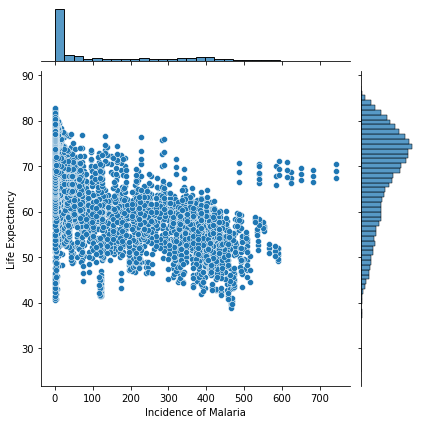

In [344]:
sns.jointplot(x='Incidence of Malaria', y='Life Expectancy', data=df)

## Incidence of Tuberculosis

Incidence of tuberculosis (per 100 000 population per year)

In [345]:
#Vemos las características del dataset que tienen este dato
df[df['Incidence of Tuberculosis'].notna()][['Year', 'Life Expectancy', 'Incidence of Tuberculosis']].describe()

Year  Life Expectancy  Incidence of Tuberculosis
count  9824.000000      9824.000000                9824.000000
mean   2009.553135        69.574542                 138.142978
std       5.761455         9.579966                 204.898983
min    2000.000000        38.861000                   0.000000
25%    2005.000000        63.230500                  14.000000
50%    2010.000000        71.655500                  52.000000
75%    2015.000000        76.834000                 189.000000
max    2019.000000        87.669000                1590.000000

In [346]:
df[(df['Year'] >= 2000)&(df['Year'] <= 2019)][['Country', 'Year', 'Life Expectancy']].describe()

Year  Life Expectancy
count  11220.000000     11220.000000
mean    2009.500000        69.659616
std        5.766538         9.388023
min     2000.000000        38.861000
25%     2004.750000        63.677750
50%     2009.500000        71.669000
75%     2014.250000        76.660000
max     2019.000000        87.669000

<AxesSubplot:xlabel='Incidence of Tuberculosis', ylabel='Count'>

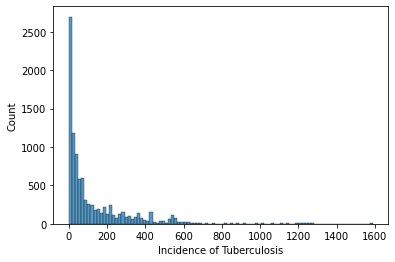

In [347]:
sns.histplot(df['Incidence of Tuberculosis'])

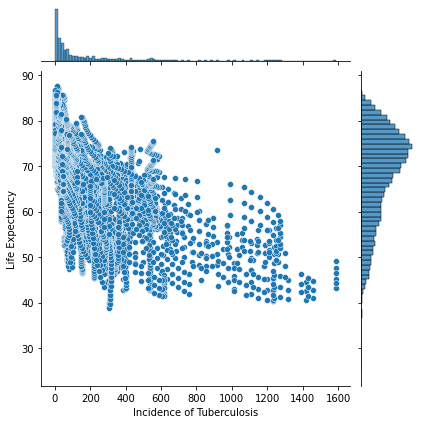

In [348]:
sns.jointplot(x='Incidence of Tuberculosis', y='Life Expectancy', data=df)

## Hepatirus B Surface Antigen

Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years (%)

In [349]:
#Vemos las características del dataset que tienen este dato
df[df['Hepatirus B Surface Antigen'].notna()][['Year', 'Life Expectancy', 'Hepatirus B Surface Antigen']].describe()

Year  Life Expectancy  Hepatirus B Surface Antigen
count   496.0       496.000000                   496.000000
mean   2015.0        71.502274                     1.520706
std       0.0         8.322350                     2.467425
min    2015.0        47.979000                     0.010000
25%    2015.0        65.327000                     0.247500
50%    2015.0        72.982500                     0.560000
75%    2015.0        77.963750                     1.855000
max    2015.0        86.961000                    21.130000

In [350]:
#Solo tenemos el año 2015
df[(df['Year'] == 2015)][['Year', 'Life Expectancy']].describe()

Year  Life Expectancy
count   561.0       561.000000
mean   2015.0        71.614558
std       0.0         8.135824
min    2015.0        47.979000
25%    2015.0        66.085000
50%    2015.0        73.088000
75%    2015.0        77.837000
max    2015.0        86.961000

<AxesSubplot:xlabel='Hepatirus B Surface Antigen', ylabel='Count'>

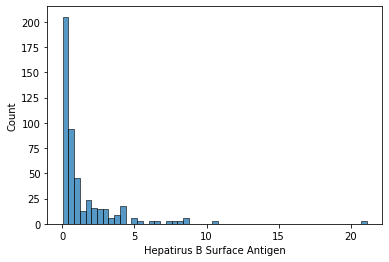

In [351]:
sns.histplot(df['Hepatirus B Surface Antigen'])

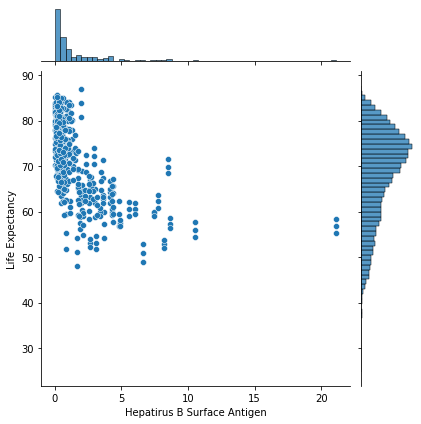

In [352]:
sns.jointplot(x='Hepatirus B Surface Antigen', y='Life Expectancy', data=df)

## Intervention Against NTDs

Reported number of people requiring interventions against NTDs

In [355]:
#Vemos las características del dataset que tienen este dato
df[df['Intervention Against NTDs'].notna()][['Year', 'Life Expectancy', 'Intervention Against NTDs']].describe()

Year  Life Expectancy  Intervention Against NTDs
count  4461.000000      4461.000000               4.461000e+03
mean   2014.002690        71.122117               1.071885e+07
std       2.581061         8.586902               6.030275e+07
min    2010.000000        42.412000               0.000000e+00
25%    2012.000000        64.921000               4.200000e+01
50%    2014.000000        72.659000               1.046850e+05
75%    2016.000000        77.782000               4.410048e+06
max    2018.000000        87.514000               8.460000e+08

In [356]:
df[(df['Year'] >= 2010)&(df['Year'] <= 2018)][['Year', 'Life Expectancy']].describe()

Year  Life Expectancy
count  5049.000000      5049.000000
mean   2014.000000        71.242909
std       2.582245         8.392400
min    2010.000000        42.412000
25%    2012.000000        65.539000
50%    2014.000000        72.707000
75%    2016.000000        77.596000
max    2018.000000        87.514000

<AxesSubplot:xlabel='Intervention Against NTDs', ylabel='Count'>

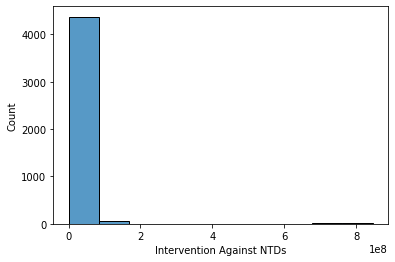

In [358]:
sns.histplot(df['Intervention Against NTDs'], bins=10)

In [362]:
#Vemos las filas con más de 80 millones de intervenciones
df[df['Intervention Against NTDs'] > 80000000].head(50)

Country  Year      Gender  Life Expectancy  Infant Mortality Rate  \
1650  Bangladesh  2010  Both sexes           69.881                  38.58   
1651  Bangladesh  2010      Female           71.257                  35.97   
1652  Bangladesh  2010        Male           68.694                  41.09   
1653  Bangladesh  2011  Both sexes           70.256                  36.79   
1654  Bangladesh  2011      Female           71.721                  34.33   
1655  Bangladesh  2011        Male           68.996                  39.15   
1656  Bangladesh  2012  Both sexes           70.606                  35.12   
1657  Bangladesh  2012      Female           72.159                  32.80   
1658  Bangladesh  2012        Male           69.273                  37.33   
1659  Bangladesh  2013  Both sexes           70.930                  33.54   
1660  Bangladesh  2013      Female           72.571                  31.37   
1661  Bangladesh  2013        Male           69.526                  35.63   
8850       India  2010  Both sexes           66.693                  45.14   
8851       India  2010      Female           67.730                  45.94   
8852       India  2010        Male           65.723                  44.37   
8853       India  2011  Both sexes           67.130                  43.00   
8854       India  2011      Female           68.218                  43.67   
8855       India  2011        Male           66.115                  42.34   
8856       India  2012  Both sexes           67.545                  40.89   
8857       India  2012      Female           68.680                  41.46   
8858       India  2012        Male           66.488                  40.36   
8859       India  2013  Both sexes           67.931                  38.84   
8860       India  2013      Female           69.106                  39.31   
8861       India  2013        Male           66.840                  38.40   
8862       India  2014  Both sexes           68.286                  36.85   
8863       India  2014      Female           69.491                  37.22   
8864       India  2014        Male           67.167                  36.49   
8865       India  2015  Both sexes           68.607                  34.94   
8866       India  2015      Female           69.835                  35.20   
8867       India  2015        Male           67.468                  34.67   
8868       India  2016  Both sexes           68.897                  33.11   
8869       India  2016      Female           70.142                  33.27   
8870       India  2016        Male           67.745                  32.93   
8871       India  2017  Both sexes           69.165                  31.36   
8872       India  2017      Female           70.425                  31.45   
8873       India  2017        Male           68.000                  31.28   
8874       India  2018  Both sexes           69.416                  29.73   
8875       India  2018      Female           70.692                  29.74   
8876       India  2018        Male           68.239                  29.71   
8940   Indonesia  2010  Both sexes           69.205                  27.97   
8941   Indonesia  2010      Female           71.311                  24.93   
8942   Indonesia  2010        Male           67.182                  30.86   
8943   Indonesia  2011  Both sexes           69.542                  26.96   
8944   Indonesia  2011      Female           71.690                  23.99   
8945   Indonesia  2011        Male           67.485                  29.78   
8946   Indonesia  2012  Both sexes           69.866                  26.01   
8947   Indonesia  2012      Female           72.047                  23.11   
8948   Indonesia  2012        Male           67.784                  28.75   
8949   Indonesia  2013  Both sexes           70.179                  25.08   
8950   Indonesia  2013      Female           72.383                  22.26   

      Low CI Value Infant Mort

Donde hay tantas intervenciones son países con una población muy alta. Convendría dividir este indicador entre la población del país en ese año

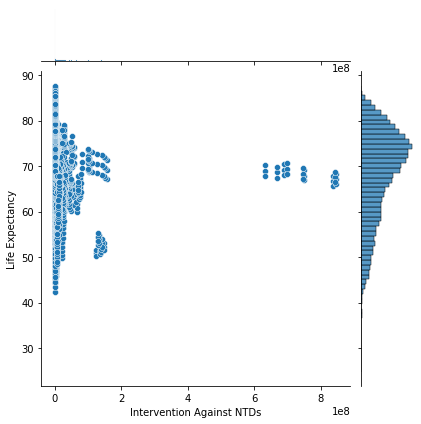

In [363]:
sns.jointplot(x='Intervention Against NTDs', y='Life Expectancy', data=df)

In [222]:
df

Country  Year      Gender  Life Expectancy  Infant Mortality Rate  \
0      Afghanistan  1990  Both sexes           50.331                  120.4   
1      Afghanistan  1990      Female           51.442                  114.2   
2      Afghanistan  1990        Male           49.281                  126.2   
3      Afghanistan  1991  Both sexes           50.999                  116.8   
4      Afghanistan  1991      Female           52.119                  110.7   
...            ...   ...         ...              ...                    ...   
22045     Zimbabwe  2018      Female           62.598                    NaN   
22046     Zimbabwe  2018        Male           59.501                    NaN   
22047     Zimbabwe  2019  Both sexes           61.490                    NaN   
22048     Zimbabwe  2019      Female           62.899                    NaN   
22049     Zimbabwe  2019        Male           59.798                    NaN   

       Low CI Value Infant Mortality Rate  \
0                                   111.2   
1                                   105.1   
2                                   116.4   
3                                   108.2   
4                                   102.1   
...                                   ...   
22045                                 NaN   
22046                                 NaN   
22047                                 NaN   
22048                                 NaN   
22049                                 NaN   

       High CI Value Infant Mortality Rate  Under 5 Mortality Rate  \
0                                    130.9                   177.7   
1                                    124.7                   173.1   
2                                    137.5                   182.0   
3                                    126.2                   171.7   
4                                    120.4                   167.1   
...                                    ...                     ...   
22045                                  NaN                     NaN   
22046                                  NaN                     NaN   
22047                                  NaN                     NaN   
22048                                  NaN                     NaN   
22049                                  NaN                     NaN   

       Low CI Value Under 5 Mortality Rate  \
0                                    162.5   
1                                    158.0   
2                                    166.6   
3                                    157.6   
4                                    153.0   
...                                    ...   
22045                                  NaN   
22046                                  NaN   
22047                                  NaN   
22048                                  NaN   
22049                                  NaN   

       High CI Value Under 5 Mortality Rate  % Death Cardiovascular  \
0                                     194.3                     NaN   
1                                     189.7                     NaN   
2                                     199.3                     NaN   
3                                     186.9                     NaN   
4                                     182.6                     NaN   
...                                     ...                     ...   
22045                                   NaN                    27.4   
22046                                   NaN                    30.3   
22047                                   NaN                    28.4   
22048                                   NaN                    27.1   
22049                                   NaN                    30.3   

       Low CI Value % Death Cardiovascular  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                               

# Transformación de datos

Podemos realizar diferentes clasificaciones de países:
- Por zona geográfica
- Desarrollados, subdesarrollados y en vias de desarrollo
- Nutrición: https://knoema.es/infographics/gcaicze/difference-of-daily-diet-across-countries
- https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf
- etc.

- Country
    - Hacer clasificaciones de países (si procede porque al final puede ser una feature más realmente a partir de un csv)
    - Eliminamos la columna Country
- Year
    - Escalar
- Gender
    - Hacer Get Dummies con male y female y both sexes con ambos
- Infant Mortaity Rate
    - Escalar
- Under 5 Mortality Rate
    - Escalar
- % Deaths Cardiovascular
    - Normalizar o Estandarizar
- Suicides Rate
    - Escalar
    - NaNs: Quizá interpolar. Extrapolar no.
- Alcohol Abuse
    - Escalar
    - NaNs:  Quizá interpolar. Extrapolar no.
- Air Pollution Death Rate
    - Escalar todos los Age Standarized, Lower Respiratory Infections y Trachea Bronchus Lung Cancers.
    - Normalizar o estandarizar Stroke, Ischaemic Heart Disease, Chronic Obstructive Pulmonary Disease y Total
    - NaNs: Solo tengo 2016 por lo que podría o poner la mediana o poner valores por países.
- Unsafe Wash Mortality Rate
    - Escalar
    - NaNs: Solo tengo 2016 por lo que podría o poner la mediana o poner valores por países.
- Poisoning Mortality Rate
    - Escalar
    - NaNs: Interpolar
- Tobacco Prevalence
    - Los datos que tenemos no son una muestra representativa del conjunto. Igual me la cargo porque no se le ve demasiada relación con la varible objetivo, pero es un poco precipitado.
    - En todo caso la estandarizaría o normalizaría.
    - NaNs: Se podría interpolar e incluso extrapolar
- Population Ages
    - Normalizar y estandarizar
    - No sé hasta qué punto tiene sentido tener estas features porque no es un factor de un país que se pueda cambiar.
    - Quizá está demasiado ligado a la esperanza de vida.
- Maternal Mortality Ratio
    - Escalar
- % of Births Attended By Skilled Personal
    - Escalar
- Neonatal Mortality Rate
    - Escalar
- Incidence of Malaria
    - Los datos que tenemos no son una muestra representativa del conjunto. Igual me la cargo porque no se le ve demasiada relación con la varible objetivo, pero es un poco precipitado porque es un indicador que me gusta.
    - NaNs: Habría que hacer algo importante con ellos
- Incidence of Tuberculosis
    - Escalar
- Hepatirus B Surface Antigen
    - Solo tenemos el año 2015
    - Escalar
- Intervention Against NTDs
    - Dividir entre la población por país y volver a mirar

# Tratamiento de valores vacíos (NaN)

In [223]:
#Número de NaNs que hay por fila
nans = []
for i in range(df.shape[0]):
    nans.append(df.loc[i].isna().sum().sum())
n_nans = np.array(nans)

KeyError: 90

In [ ]:
#Número de filas con N columnas vacías
sns.histplot(n_nans)
plt.xlabel('Número de columnas vacías')
plt.ylabel('Número de filas')

In [ ]:
#Habrá que eliminar aquellas filas que tengan demasiados NaNs